# Plotting for Bachelor Thesis

In [19]:
import sys
sys.path.append('../datasets') 
import dataset_long as dsl

sys.path.append('../fitting') 
import paramfitt_singlePatient as pf 

# Model
import numpy as np
import tellurium as te
# Plotting
import matplotlib.pyplot as plt
import seaborn as sns
# Dataframe
import pandas as pd

#Estimation

from scipy.optimize import minimize 
from collections import OrderedDict
from scipy.stats import qmc
from scipy.optimize import basinhopping
#Analyse Estimation
from scipy.stats import chi2
from scipy.stats import norm

# Save optimization params
import json
import time

# Results 

## Simulation Iinfection

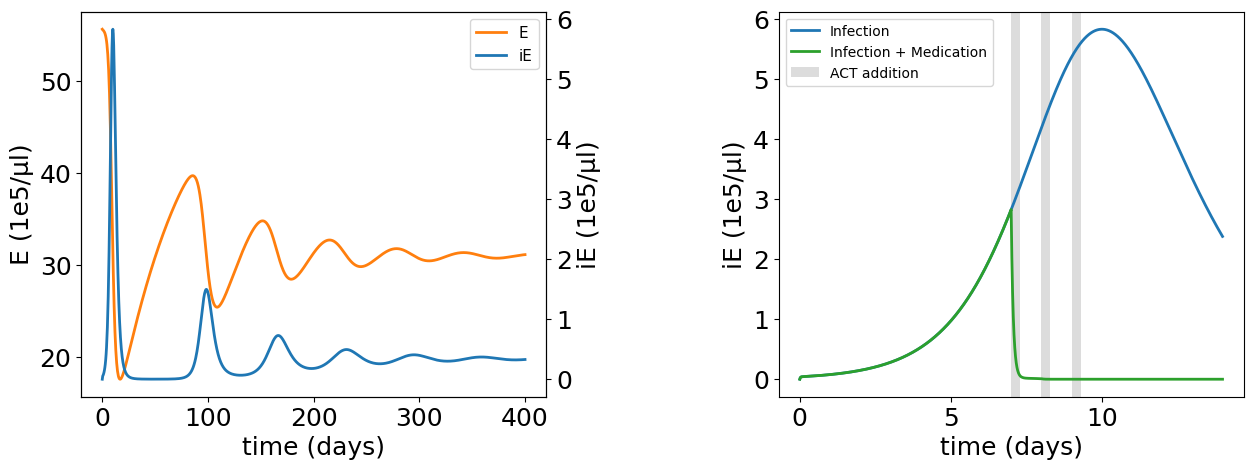

## Paramscan BHmax

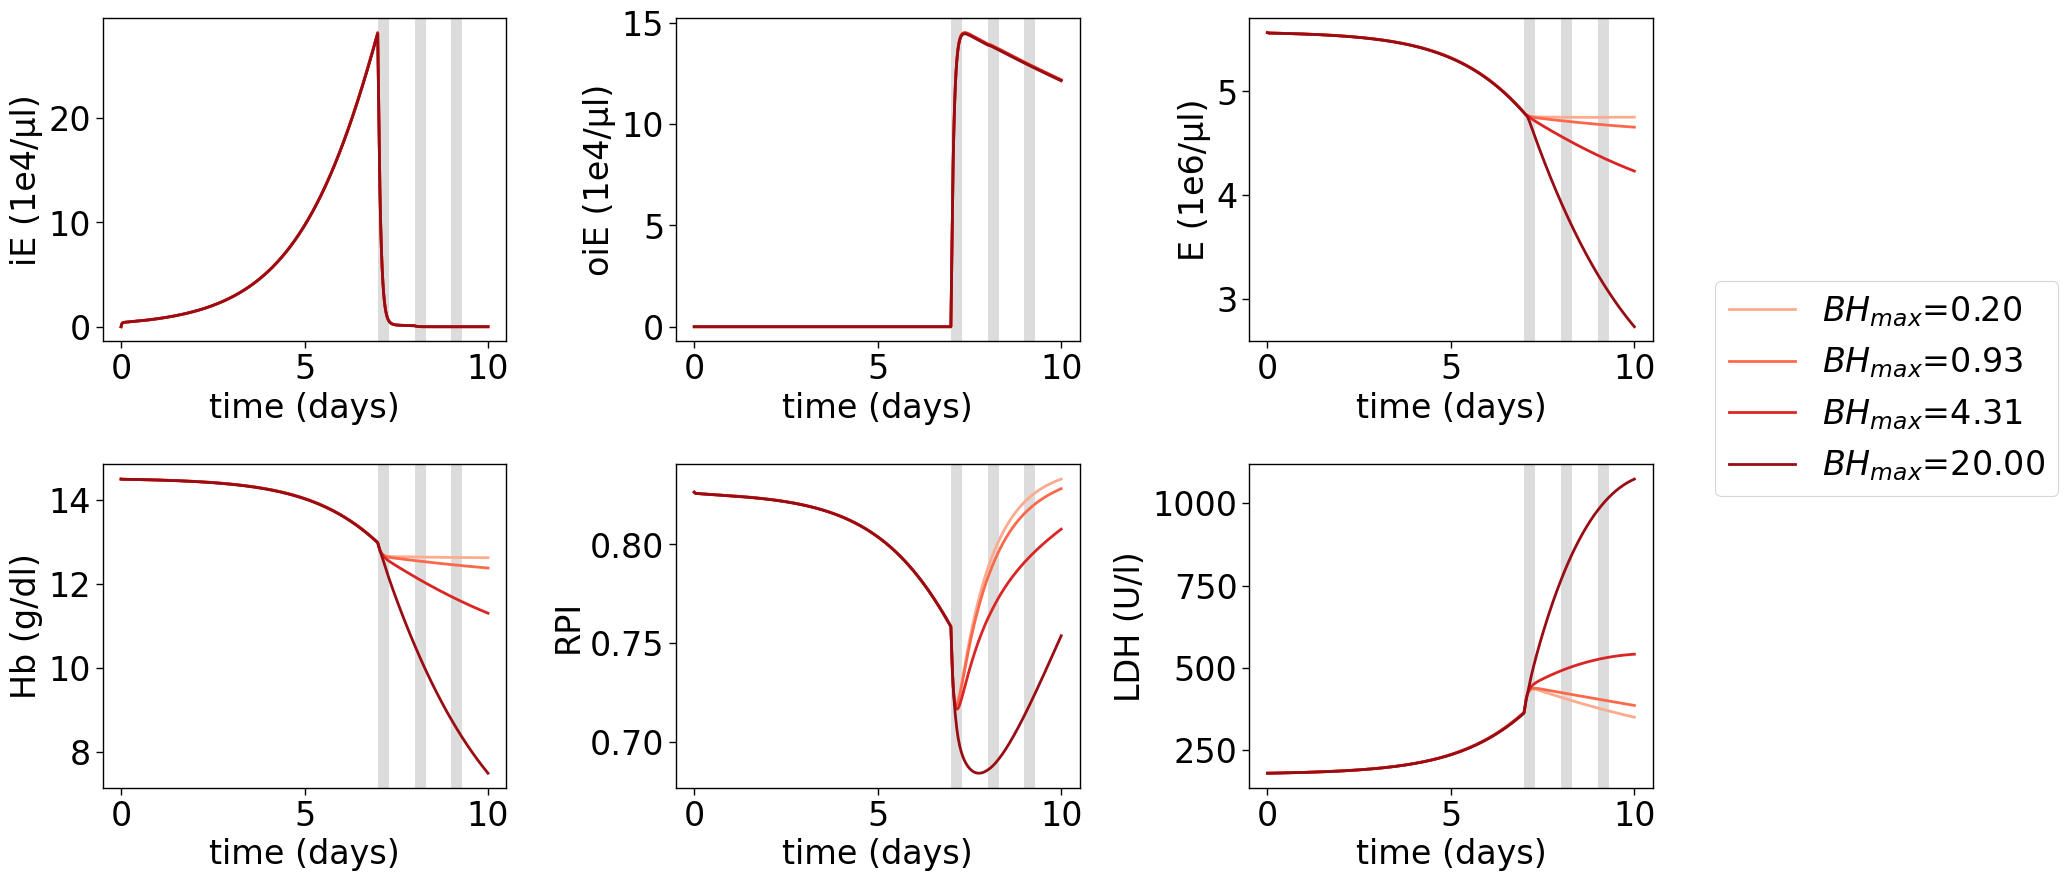

[<matplotlib.lines.Line2D object at 0x000002A276CB7B90>, <matplotlib.lines.Line2D object at 0x000002A276CEA050>, <matplotlib.lines.Line2D object at 0x000002A276D1C710>, <matplotlib.lines.Line2D object at 0x000002A276D4A690>] ['$BH_{max}$=0.20', '$BH_{max}$=0.93', '$BH_{max}$=4.31', '$BH_{max}$=20.00']


In [13]:
species_to_analyze = OrderedDict({
    '[iE]': ['iE (1e4/µl)', 1e4],
    '[oiE]': ['oiE (1e4/µl)', 1e4],
    '[E]': ['E (1e6/µl)', 1e6],
    'Hb': ['Hb (g/dl)', 1],
    'RPI': ['RPI', 1],
    'LDH': ['LDH (U/l)',1],
})

# Definition der Parameter-Boundaries
params_bounds = OrderedDict({
    'BH_max': (2e-1, 20),
})


# Konvertiere bounds in logscale
params_bounds_log = pf.convert_bounds_to_logscale(params_bounds)

# Anzahl der Werte pro Parameter 
num_values_per_param = 4

# Erzeugung der Wertemengen für jeden Parameter
param_values = {}
for param, bounds in params_bounds_log.items():
    param_values[param] = np.linspace(bounds[0], bounds[1], num_values_per_param)

# Durchführung des Parameter-Scans und Erstellung der Plots
fig, axs = plt.subplots(2,3, figsize=(20,10))
fig.subplots_adjust(hspace=0.38, wspace= 0.42)
size_of_font = 24

# Farbübergang
cmap = plt.colormaps.get_cmap('Reds')
color_start = 0.3
MAX = {}
MIN = {}

for i, (param, values) in enumerate(param_values.items()):
    p_max = {}
    p_min = {}

    for idx, value in enumerate(values):
        model = te.loada('.././model/OIE_model.ant')

        model_str = model.getAntimony()        #lade Antimony string
        model_lines = model_str.split('\n')    #splitte in für jede Zeile
        new_model_lines = []

        for line in model_lines:         #gehe alle zeielen durch, ändere wnn parameter geändert werden soll, füge in neuen strig zu
            if line.startswith(f'{param}=') or line.startswith(f'{param} '):   # if line.startswith(param):
                line = f'{param}={10**value}'
            new_model_lines.append(line)
        new_model_str = '\n'.join(new_model_lines)    
        model = te.loada(new_model_str) 

        result = model.simulate(0, 10, 500, ['time']+list(species_to_analyze.keys()))
        p_max[10**value] = np.max(result["RPI"])
        p_min[10**value] = np.min(result["RPI"])


        for j, specie in enumerate (species_to_analyze.keys()):

            row = j //3
            col = j % 3


            axs[row][col].plot(result['time'], result[specie]/species_to_analyze[specie][1], label=f'$BH_{{max}}$={round(10**value,2):.2f}', color=cmap(color_start + idx * (00.8 / num_values_per_param)))
            axs[row][col].set_xlabel('time (days)',fontsize= size_of_font)
            axs[row][col].set_ylabel(species_to_analyze[specie][0],fontsize= size_of_font)
            axs[row, col].tick_params(labelsize=size_of_font)

            axs[row][col].axvspan(7, 7.3, facecolor='gainsboro', alpha=1, linewidth=2) #, label='ACT Administration')
            axs[row][col].axvspan(8, 8.3, facecolor='gainsboro', alpha=1, linewidth=2)
            axs[row][col].axvspan(9, 9.3, facecolor='gainsboro', alpha=1, linewidth=2)
            
        handles, labels = axs[row][col].get_legend_handles_labels()  # Legend Box outsides Subplots
    MAX[param] = p_max
    MIN[param] = p_min

axs[1][1].legend(handles, labels, loc='lower center', bbox_to_anchor=(3.0, 0.85),fontsize= size_of_font) #bbox (nach rechts-links, oben-unten, negativ yes)


plt.savefig("./figures/paramscan_BHmax.pdf", format="pdf",bbox_inches='tight')

plt.show()

print(handles, labels)

#plt.savefig("plot.pdf")

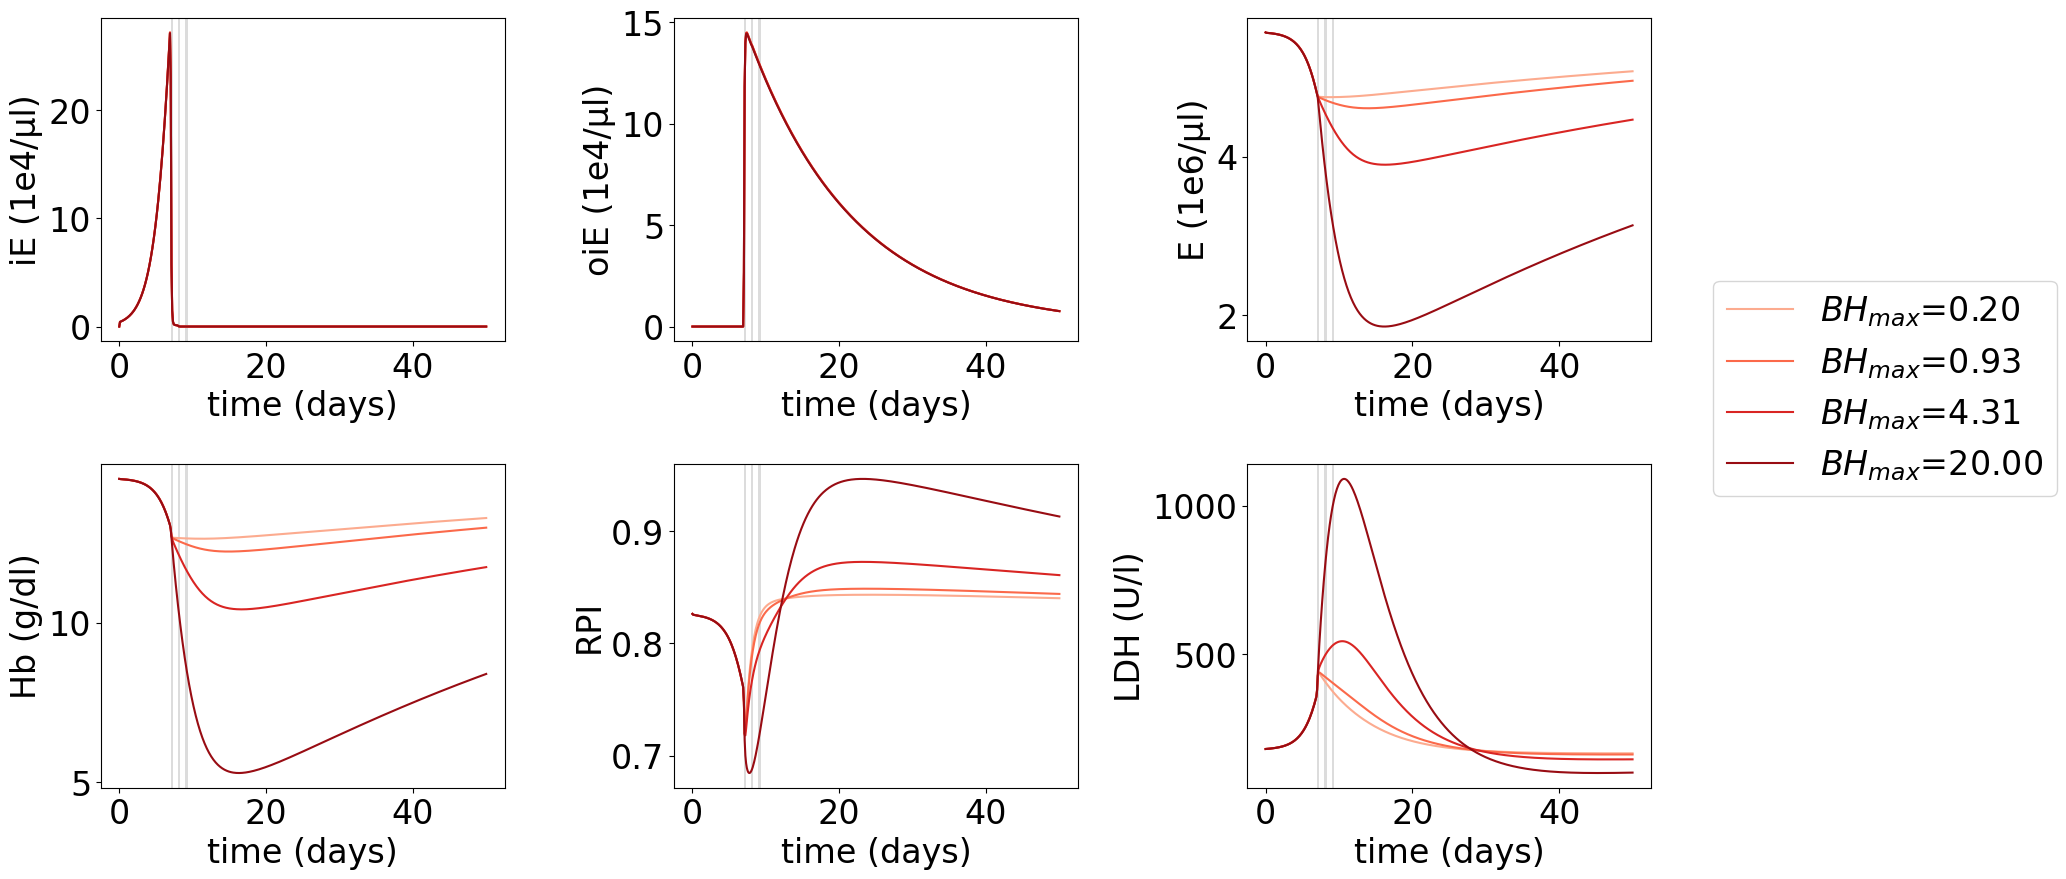

[<matplotlib.lines.Line2D object at 0x000002A270EB6290>, <matplotlib.lines.Line2D object at 0x000002A270EE6190>, <matplotlib.lines.Line2D object at 0x000002A270F19F90>, <matplotlib.lines.Line2D object at 0x000002A270F4CA10>] ['$BH_{max}$=0.20', '$BH_{max}$=0.93', '$BH_{max}$=4.31', '$BH_{max}$=20.00']


In [5]:
species_to_analyze = OrderedDict({
    '[iE]': ['iE (1e4/µl)', 1e4],
    '[oiE]': ['oiE (1e4/µl)', 1e4],
    '[E]': ['E (1e6/µl)', 1e6],
    'Hb': ['Hb (g/dl)', 1],
    'RPI': ['RPI', 1],
    'LDH': ['LDH (U/l)',1],
})

# Definition der Parameter-Boundaries
params_bounds = OrderedDict({
    'BH_max': (2e-1, 20),
})


# Konvertiere bounds in logscale
params_bounds_log = pf.convert_bounds_to_logscale(params_bounds)

# Anzahl der Werte pro Parameter 
num_values_per_param = 4

# Erzeugung der Wertemengen für jeden Parameter
param_values = {}
for param, bounds in params_bounds_log.items():
    param_values[param] = np.linspace(bounds[0], bounds[1], num_values_per_param)

# Durchführung des Parameter-Scans und Erstellung der Plots
fig, axs = plt.subplots(2,3, figsize=(20,10))
fig.subplots_adjust(hspace=0.38, wspace= 0.42)
size_of_font = 24

# Farbübergang
cmap = plt.colormaps.get_cmap('Reds')
color_start = 0.3
MAX = {}
MIN = {}

for i, (param, values) in enumerate(param_values.items()):
    p_max = {}
    p_min = {}

    for idx, value in enumerate(values):
        model = te.loada('.././model/OIE_model.ant')

        model_str = model.getAntimony()        #lade Antimony string
        model_lines = model_str.split('\n')    #splitte in für jede Zeile
        new_model_lines = []

        for line in model_lines:         #gehe alle zeielen durch, ändere wnn parameter geändert werden soll, füge in neuen strig zu
            if line.startswith(f'{param}=') or line.startswith(f'{param} '):   # if line.startswith(param):
                line = f'{param}={10**value}'
            new_model_lines.append(line)
        new_model_str = '\n'.join(new_model_lines)    
        model = te.loada(new_model_str) 

        result = model.simulate(0, 50, 500, ['time']+list(species_to_analyze.keys()))
        p_max[10**value] = np.max(result["RPI"])
        p_min[10**value] = np.min(result["RPI"])


        for j, specie in enumerate (species_to_analyze.keys()):

            row = j //3
            col = j % 3


            axs[row][col].plot(result['time'], result[specie]/species_to_analyze[specie][1], label=f'$BH_{{max}}$={round(10**value,2):.2f}', color=cmap(color_start + idx * (00.8 / num_values_per_param)))
            axs[row][col].set_xlabel('time (days)',fontsize= size_of_font)
            axs[row][col].set_ylabel(species_to_analyze[specie][0],fontsize= size_of_font)
            axs[row, col].tick_params(labelsize=size_of_font)

            axs[row][col].axvspan(7, 7.3, facecolor='gainsboro', alpha=1, linewidth=2) #, label='ACT Administration')
            axs[row][col].axvspan(8, 8.3, facecolor='gainsboro', alpha=1, linewidth=2)
            axs[row][col].axvspan(9, 9.3, facecolor='gainsboro', alpha=1, linewidth=2)
            
        handles, labels = axs[row][col].get_legend_handles_labels()  # Legend Box outsides Subplots
    MAX[param] = p_max
    MIN[param] = p_min

axs[1][1].legend(handles, labels, loc='lower center', bbox_to_anchor=(3.0, 0.85),fontsize= size_of_font) #bbox (nach rechts-links, oben-unten, negativ yes)


plt.savefig("./figures/paramscan_BHmax.pdf", format="pdf",bbox_inches='tight')

plt.show()

print(handles, labels)

#plt.savefig("plot.pdf")

Text(0, 0.5, 'RPI min')

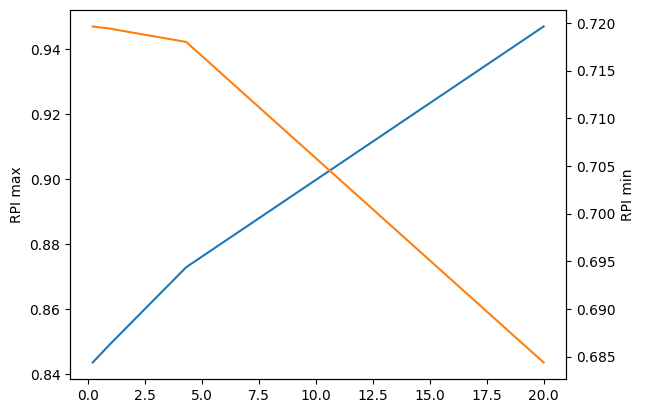

In [6]:
x = MAX["BH_max"].keys()
y1 = MAX["BH_max"].values()
y2 = MIN["BH_max"].values()


plt.plot(x,y1)
ax1 = plt.gca()

ax2 = plt.gca().twinx()
ax2.plot(x,y2,color = "tab:orange")
plt.xlabel("BH_max")
ax1.set_ylabel("RPI max")
ax2.set_ylabel("RPI min")

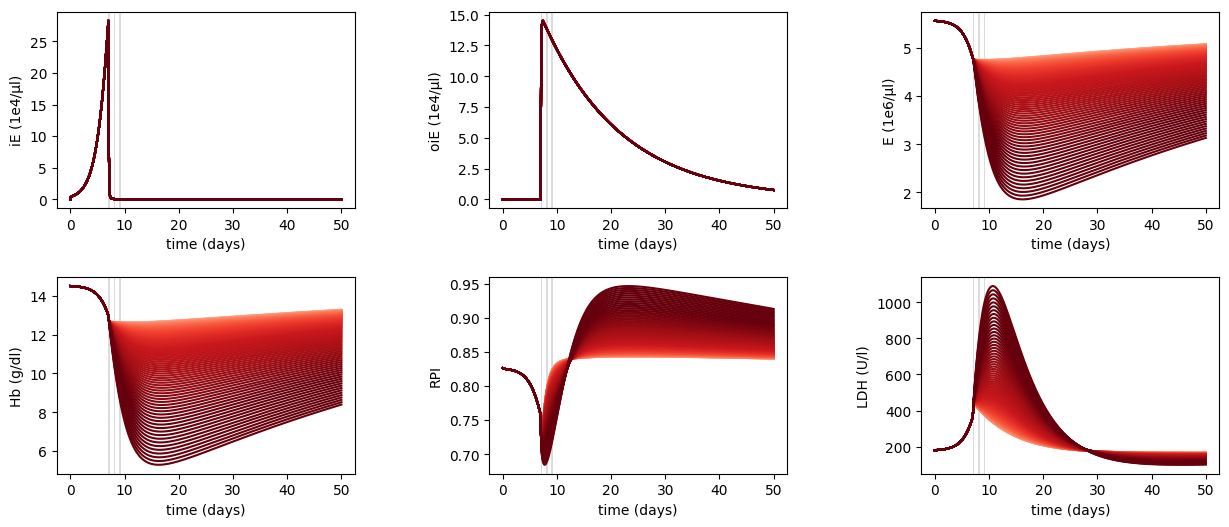

[<matplotlib.lines.Line2D object at 0x000002A270FD5750>, <matplotlib.lines.Line2D object at 0x000002A271005290>, <matplotlib.lines.Line2D object at 0x000002A27103C190>, <matplotlib.lines.Line2D object at 0x000002A27106A4D0>, <matplotlib.lines.Line2D object at 0x000002A2721C0BD0>, <matplotlib.lines.Line2D object at 0x000002A2721EF090>, <matplotlib.lines.Line2D object at 0x000002A272229C10>, <matplotlib.lines.Line2D object at 0x000002A27224FB50>, <matplotlib.lines.Line2D object at 0x000002A272286150>, <matplotlib.lines.Line2D object at 0x000002A2722BC5D0>, <matplotlib.lines.Line2D object at 0x000002A2722E6D90>, <matplotlib.lines.Line2D object at 0x000002A27231D210>, <matplotlib.lines.Line2D object at 0x000002A27234F250>, <matplotlib.lines.Line2D object at 0x000002A272385590>, <matplotlib.lines.Line2D object at 0x000002A2723AF950>, <matplotlib.lines.Line2D object at 0x000002A2723E9CD0>, <matplotlib.lines.Line2D object at 0x000002A272417250>, <matplotlib.lines.Line2D object at 0x000002A272

In [7]:
species_to_analyze = OrderedDict({
    '[iE]': ['iE (1e4/µl)', 1e4],
    '[oiE]': ['oiE (1e4/µl)', 1e4],
    '[E]': ['E (1e6/µl)', 1e6],
    'Hb': ['Hb (g/dl)', 1],
    'RPI': ['RPI', 1],
    'LDH': ['LDH (U/l)',1],
})

# Definition der Parameter-Boundaries
params_bounds = OrderedDict({
    'BH_max': (2e-1, 20),
})


# Konvertiere bounds in logscale
params_bounds_log = pf.convert_bounds_to_logscale(params_bounds)

# Anzahl der Werte pro Parameter 
num_values_per_param = 100

# Erzeugung der Wertemengen für jeden Parameter
param_values = {}
for param, bounds in params_bounds_log.items():
    param_values[param] = np.linspace(bounds[0], bounds[1], num_values_per_param)

# Durchführung des Parameter-Scans und Erstellung der Plots
fig, axs = plt.subplots(2,3, figsize=(15, 6))
fig.subplots_adjust(hspace=0.35, wspace= 0.45)

# Farbübergang
cmap = plt.colormaps.get_cmap('Reds')
color_start = 0.3
df_list = []


def speciesvalue_tadd(species, t_add = None,**kwargs):
    return species[t_add]

def species_max(species,**kwargs):
    return np.max(species)

def species_max_PADH(species, t_PADH = None,**kwargs):
    return np.max(species[t_PADH:])

def species_min(species,**kwargs):
    return np.min(species)

def species_min_PADH(species, t_PADH = None,**kwargs):
    return np.min(species[t_PADH:])


readouts = {
    "max":species_max,
    "max_padh":species_max_PADH,
    "min":species_min,
    "min_padh":species_min_PADH,
    "ref_value": speciesvalue_tadd,
}
for i, (param, values) in enumerate(param_values.items()):
   

    for idx, param_value in enumerate( values):
        model = te.loada('.././model/OIE_model.ant')

        
        model_str = model.getAntimony()        #lade Antimony string
        model_lines = model_str.split('\n')    #splitte in für jede Zeile
        new_model_lines = []

        for line in model_lines:         #gehe alle zeielen durch, ändere wnn parameter geändert werden soll, füge in neuen strig zu
            if line.startswith(f'{param}=') or line.startswith(f'{param} '):   # if line.startswith(param):
                line = f'{param}={10**param_value}'
            new_model_lines.append(line)
        new_model_str = '\n'.join(new_model_lines)    
        model = te.loada(new_model_str)
        t_start = 0
        t_end = 50
        n_steps = 500+1 

        result = model.simulate(t_start, t_end, n_steps, ['time']+list(species_to_analyze.keys()))
        t_add = int(np.floor(n_steps/(t_end - t_start) * model.t_ART_add))
        t_PADH = int(np.floor(n_steps/(t_end - t_start) * (model.t_ART_add+8)))


        for k in species_to_analyze.keys():
            for rn,f in readouts.items():
                df_list.append({
                    "readout_name":rn,
                    "parameter_value":10**param_value,
                    "exponent":param_value,
                    "parameter_name":param,
                    "species_name":k,
                    "value":f(result[k],t_add = t_add, t_PADH = t_PADH)
                
                })


        for j, specie in enumerate (species_to_analyze.keys()):

            row = j //3
            col = j % 3

            axs[row][col].plot(result['time'], result[specie]/species_to_analyze[specie][1], label=f'{param}={round(10**param_value,2):.2f}', color=cmap(color_start + idx * (00.8 / num_values_per_param)))
            axs[row][col].set_xlabel('time (days)')
            axs[row][col].set_ylabel(species_to_analyze[specie][0])

            axs[row][col].axvspan(7, 7.3, facecolor='gainsboro', alpha=1, linewidth=2) #, label='ACT Administration')
            axs[row][col].axvspan(8, 8.3, facecolor='gainsboro', alpha=1, linewidth=2)
            axs[row][col].axvspan(9, 9.3, facecolor='gainsboro', alpha=1, linewidth=2)
            
        handles, labels = axs[row][col].get_legend_handles_labels()  # Legend Box outsides Subplots
   

#axs[1][1].legend(handles, labels, loc='lower center', bbox_to_anchor=(0.5, -0.9),) #bbox (nach rechts-links, oben-unten, negativ yes)
plt.show()

print(handles, labels)

#plt.savefig("plot.pdf")

In [8]:
df = pd.DataFrame(df_list)

mdf = df.pivot_table(values = ["value"], columns= ["readout_name","parameter_name","species_name",], index = 'parameter_value')
mdf = mdf.droplevel(level = [0],axis = 1)

def norm(df, ref_value):
    df =  ((df.droplevel(level = 0,axis = 1) - ref_value)/ref_value)*100
    return df


mdf2 = mdf.loc[:,(slice(None),slice(None),["Hb","LDH"],)]
mdf2 = mdf2.groupby(level = [0],axis = 1).apply(norm, mdf2.loc[:, ("ref_value",)])
df = mdf2.melt(ignore_index = False)
df["parameter_value"] = df.index
df.index = pd.RangeIndex(len(df))

df = df.loc[
    ((df["species_name"] == "Hb") & (df["readout_name"] == "min_padh"))|
    ((df["species_name"] == "LDH") & (df["readout_name"] == "max_padh"))
]


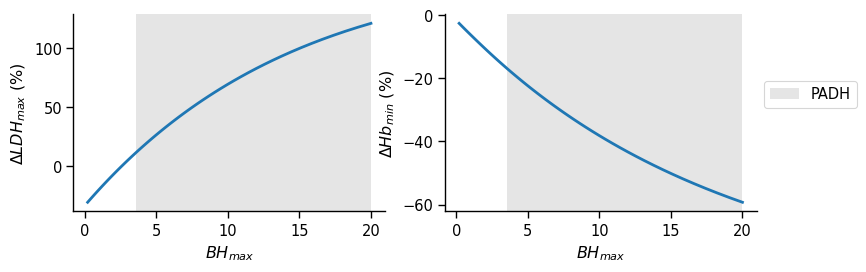

In [9]:
sns.set_context("paper",font_scale=1.2,rc = {"lines.linewidth": 2})
g = sns.FacetGrid(col = "species_name", data=df,sharey=False,height=3,aspect=1.3)
g.map_dataframe(sns.lineplot,x = 'parameter_value', y = "value")
g.add_legend(title = "Readout")


ax = g.axes
ax[0][0].set_ylabel("$\Delta LDH_{max}$ (%)")
ax[0][1].set_ylabel("$\Delta Hb_{min}$ (%)")

ax[0][0].set_title("")
ax[0][1].set_title("")

for a in ax[0]:
    a.set_xlabel("$BH_{max}$")
ldh = df.pivot(columns = ["species_name","readout_name"] , index= "parameter_value", values ="value")
padh_limit = ldh[(ldh[("LDH","max_padh")] >= 10) & (ldh[("Hb","min_padh")] <= -10)].index.min()

for a in np.ravel(ax):
    h = a.axvspan(padh_limit,20, alpha=0.2, linewidth=0, color = "tab:grey", zorder = -1)

handles, labels = a.get_legend_handles_labels()
g.legend.remove()
handles.append(h)
labels.append("PADH")
a.legend(handles = handles,labels = labels, bbox_to_anchor = (1, 0.7))

plt.savefig("./figures/paramscan_BHmax_PADHcheck.pdf", format="pdf",bbox_inches='tight')

plt.show()

In [10]:
"""
df = pd.DataFrame(df_list)
df = df.loc[df["species_name"].isin(["Hb","LDH","RPI"])]
def norm(sdf):

    ref = sdf.loc[sdf["readout_name"] == "refri","value"].values
    def norm2(x):

        x["value"]  = x["value"]/ref
        return x[["value","parameter_value","readout_name"]] #,"readout_name"]]

    sdf = sdf.groupby(["readout_name"]).apply(norm2)
    return sdf


df =  df.groupby(["parameter_name","species_name"],as_index=True).apply(norm).reset_index()
#import seaborn as sns
df

g = sns.FacetGrid(col = "species_name",row = "readout_name", data=df,sharey=False,height=2.2,aspect=2**0.5)
g.map_dataframe(sns.lineplot,x = 'parameter_value', y = "value")
plt.tight_layout()
"""


'\ndf = pd.DataFrame(df_list)\ndf = df.loc[df["species_name"].isin(["Hb","LDH","RPI"])]\ndef norm(sdf):\n\n    ref = sdf.loc[sdf["readout_name"] == "refri","value"].values\n    def norm2(x):\n\n        x["value"]  = x["value"]/ref\n        return x[["value","parameter_value","readout_name"]] #,"readout_name"]]\n\n    sdf = sdf.groupby(["readout_name"]).apply(norm2)\n    return sdf\n\n\ndf =  df.groupby(["parameter_name","species_name"],as_index=True).apply(norm).reset_index()\n#import seaborn as sns\ndf\n\ng = sns.FacetGrid(col = "species_name",row = "readout_name", data=df,sharey=False,height=2.2,aspect=2**0.5)\ng.map_dataframe(sns.lineplot,x = \'parameter_value\', y = "value")\nplt.tight_layout()\n'

In [11]:

df = pd.DataFrame(df_list)

df.to_csv('df_Rebecca_scan.csv')

df = df.loc[df["species_name"].isin(["Hb","LDH","RPI"])]
#df = df.loc[df["species_name"].isin(["Hb","LDH"])]


def norm(sdf):

    ref = sdf.loc[sdf["readout_name"] == "refri","value"].values

    def norm2(x):
        x["value"]  = x["value"]/ref
        return x[["value","parameter_value","exponent","readout_name"]]
    sdf = sdf.groupby(["readout_name"]).apply(norm2)
    return sdf


df =  df.groupby(["parameter_name","species_name"],as_index=True).apply(norm).reset_index()
df = df.loc[df["readout_name"].isin(["max","min"])]
#df = df.replace({"min":"normalized min","max":"normalized max"})
#import seaborn as sns
df

sns.set_context("paper",font_scale=1.2,rc = {"lines.linewidth": 2})
g = sns.FacetGrid(col = "species_name", data=df,sharey=False,height=3,aspect=1.3)
g.map_dataframe(sns.lineplot,x = 'parameter_value', y = "value",hue = "readout_name")
g.add_legend(title = "Readout")
g.set_titles("{col_name}")
ax = g.axes
ax[0][0].set_ylabel("Normalized readout")
for a in ax[0]:
    a.set_xlabel("$BH_{max}$")
#plt.tight_layout()
ldh = df.pivot(columns = ["species_name","readout_name"] , index= "parameter_value", values ="value")
padh_limit = ldh[(ldh[("LDH","max")] >= 1.1) & (ldh[("Hb","min")] <= 0.9)].index.min()

for a in np.ravel(ax):
   h =  a.axvspan(padh_limit,20, alpha=0.2, linewidth=0, color = "tab:grey", zorder = -1)

handles, labels = a.get_legend_handles_labels()
g.legend.remove()
handles.append(h) 
labels.append("PADH")

a.legend(handles = handles,labels = labels, bbox_to_anchor = (1, 0.7))

plt.savefig("./figures/paramscan_BHmax_fancy.pdf", format="pdf", bbox_inches= 'tight')



ValueError: operands could not be broadcast together with shapes (100,) (0,) 

In [ ]:
padh_limit

3.5772990581148707

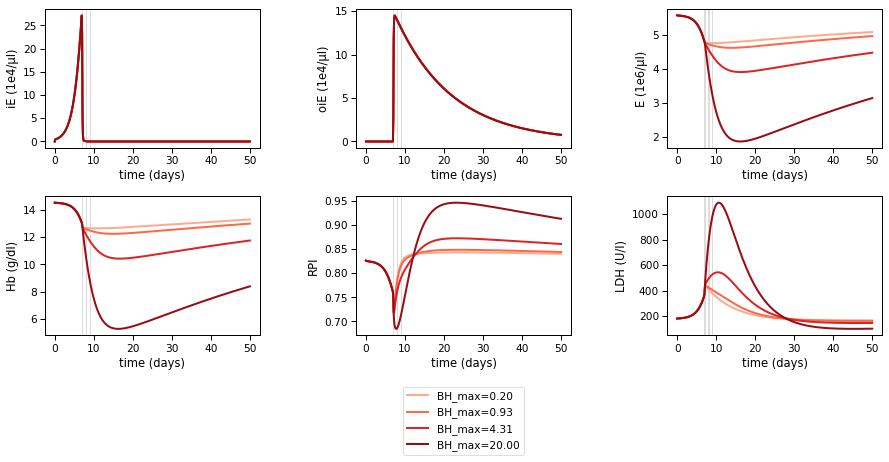

[<matplotlib.lines.Line2D object at 0x7f4366061750>, <matplotlib.lines.Line2D object at 0x7f43534e4d60>, <matplotlib.lines.Line2D object at 0x7f4357222590>, <matplotlib.lines.Line2D object at 0x7f4357421240>] ['BH_max=0.20', 'BH_max=0.93', 'BH_max=4.31', 'BH_max=20.00']


In [ ]:
species_to_analyze = OrderedDict({
    '[iE]': ['iE (1e4/µl)', 1e4],
    '[oiE]': ['oiE (1e4/µl)', 1e4],
    '[E]': ['E (1e6/µl)', 1e6],
    'Hb': ['Hb (g/dl)', 1],
    'RPI': ['RPI', 1],
    'LDH': ['LDH (U/l)',1],
})

# Definition der Parameter-Boundaries
params_bounds = OrderedDict({
    'BH_max': (2e-1, 20),
})


# Konvertiere bounds in logscale
params_bounds_log = pf.convert_bounds_to_logscale(params_bounds)

# Anzahl der Werte pro Parameter 
num_values_per_param = 4

# Erzeugung der Wertemengen für jeden Parameter
param_values = {}
for param, bounds in params_bounds_log.items():
    param_values[param] = np.linspace(bounds[0], bounds[1], num_values_per_param)

# Durchführung des Parameter-Scans und Erstellung der Plots
fig, axs = plt.subplots(2,3, figsize=(15, 6))
fig.subplots_adjust(hspace=0.35, wspace= 0.45)

# Farbübergang
cmap = plt.colormaps.get_cmap('Reds')
color_start = 0.3

for i, (param, values) in enumerate(param_values.items()):
    for idx, value in enumerate(values):
        model = te.loada('.././model/OIE_model.ant')

        model_str = model.getAntimony()        #lade Antimony string
        model_lines = model_str.split('\n')    #splitte in für jede Zeile
        new_model_lines = []

        for line in model_lines:         #gehe alle zeielen durch, ändere wnn parameter geändert werden soll, füge in neuen strig zu
            if line.startswith(f'{param}=') or line.startswith(f'{param} '):   # if line.startswith(param):
                line = f'{param}={10**value}'
            new_model_lines.append(line)
        new_model_str = '\n'.join(new_model_lines)    
        model = te.loada(new_model_str) 

        result = model.simulate(0, 50, 500, ['time']+list(species_to_analyze.keys()))
        
        for j, specie in enumerate (species_to_analyze.keys()):

            row = j //3
            col = j % 3

            axs[row][col].plot(result['time'], result[specie]/species_to_analyze[specie][1], label=f'{param}={round(10**value,2):.2f}', color=cmap(color_start + idx * (00.8 / num_values_per_param)))
            axs[row][col].set_xlabel('time (days)')
            axs[row][col].set_ylabel(species_to_analyze[specie][0])

            axs[row][col].axvspan(7, 7.3, facecolor='gainsboro', alpha=1, linewidth=2) #, label='ACT Administration')
            axs[row][col].axvspan(8, 8.3, facecolor='gainsboro', alpha=1, linewidth=2)
            axs[row][col].axvspan(9, 9.3, facecolor='gainsboro', alpha=1, linewidth=2)
            
        handles, labels = axs[row][col].get_legend_handles_labels()  # Legend Box outsides Subplots
axs[1][1].legend(handles, labels, loc='lower center', bbox_to_anchor=(0.5, -0.9),) #bbox (nach rechts-links, oben-unten, negativ yes)
plt.show()

print(handles, labels)

#plt.savefig("plot.pdf")

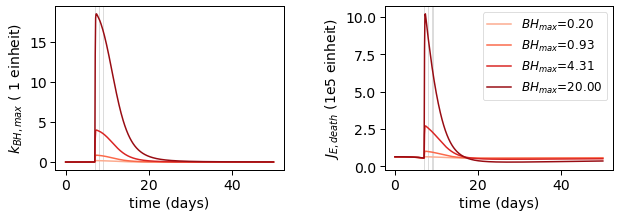

In [ ]:
species_to_analyze = OrderedDict({
    'k_BH_max': ['k_BH_max  einheit', 1],
    'J_E_death':['J_E_death (1/day)', 1e5]
})

# Definition der Parameter-Boundaries
params_bounds = OrderedDict({
    'BH_max': (2e-1, 20),
})


# Konvertiere bounds in logscale
params_bounds_log = pf.convert_bounds_to_logscale(params_bounds)

# Anzahl der Werte pro Parameter 
num_values_per_param = 4

# Erzeugung der Wertemengen für jeden Parameter
param_values = {}
for param, bounds in params_bounds_log.items():
    param_values[param] = np.linspace(bounds[0], bounds[1], num_values_per_param)

# Adjust figure size for paper
fig, axs = plt.subplots(1,2, figsize=(10,3)) #
fig.subplots_adjust(hspace=0.38, wspace=0.44)

# Adjust font size for paper
size_of_font = 14

cmap = plt.colormaps.get_cmap('Reds')
color_start = 0.3

for i, (param, values) in enumerate(param_values.items()):
    for idx, value in enumerate(values):

        model = te.loada('.././model/OIE_model.ant')

        model_str = model.getAntimony()        #lade Antimony string
        model_lines = model_str.split('\n')    #splitte in für jede Zeile
        new_model_lines = []

        for line in model_lines:         #gehe alle zeielen durch, ändere wnn parameter geändert werden soll, füge in neuen strig zu
            if line.startswith(f'{param}=') or line.startswith(f'{param} '):   # if line.startswith(param):
                line = f'{param}={10**value}'
            new_model_lines.append(line)
        new_model_str = '\n'.join(new_model_lines)    
        model = te.loada(new_model_str) 

        result = model.simulate(0, 50, 500, ['time']+list(species_to_analyze.keys()))
        
        for j, specie in enumerate(species_to_analyze.keys()):
            col = j % 2

            axs[col].plot(result['time'], result[specie]/species_to_analyze[specie][1], label=f'$BH_{{max}}$={round(10**value,2):.2f}', color=cmap(color_start + idx * (0.8 / num_values_per_param)), linewidth=1.5)
            axs[col].set_xlabel('time (days)',fontsize=size_of_font)

            axs[0].set_ylabel( '$k_{{BH,max}}$ ( 1 einheit)',fontsize=size_of_font)
            axs[1].set_ylabel( '$J_{{E,death}}$ (1e5 einheit)',fontsize=size_of_font)

            axs[col].tick_params(labelsize=size_of_font)
            axs[col].axvspan(7, 7.3, facecolor='gainsboro', alpha=1, linewidth=1.2)
            axs[col].axvspan(8, 8.3, facecolor='gainsboro', alpha=1, linewidth=1.2)
            axs[col].axvspan(9, 9.3, facecolor='gainsboro', alpha=1, linewidth=1.2)

        handles, labels = axs[col].get_legend_handles_labels()
        
# Adjusted legend position and size
axs[1].legend(handles, labels, loc='upper right', fontsize=size_of_font - 2)

# Save the figure in high resolution for paper
plt.savefig("./figures/paramscan_BHmax_BHrates.pdf", format="pdf", dpi=200, bbox_inches='tight')
plt.show()


## EInfluss Hkt_init

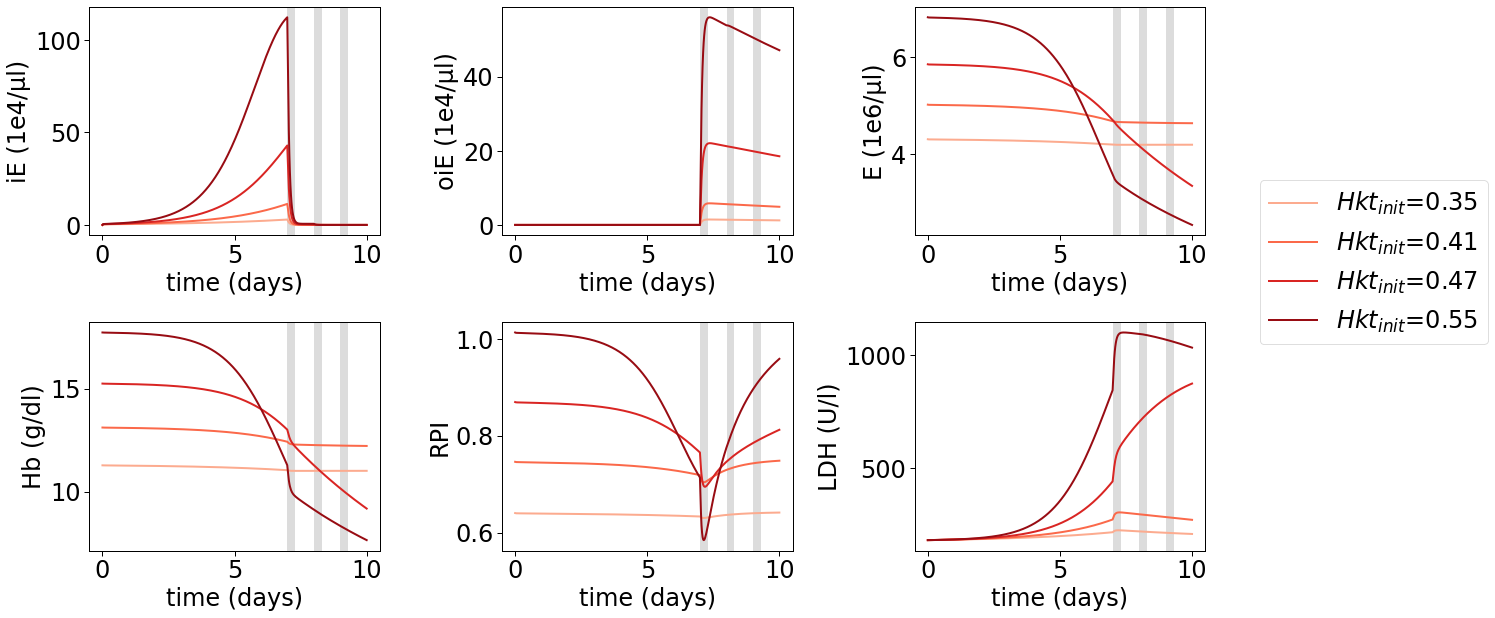

In [ ]:
species_to_analyze = OrderedDict({
    '[iE]': ['iE (1e4/µl)', 1e4],
    '[oiE]': ['oiE (1e4/µl)', 1e4],
    '[E]': ['E (1e6/µl)', 1e6],
    'Hb': ['Hb (g/dl)', 1],
    'RPI': ['RPI', 1],
    'LDH': ['LDH (U/l)',1],
})

# Definition der Parameter-Boundaries
params_bounds = OrderedDict({
    'Hkt_init': (0.35, 0.55), 
})


# Konvertiere bounds in logscale
params_bounds_log = pf.convert_bounds_to_logscale(params_bounds)

# Anzahl der Werte pro Parameter 
num_values_per_param = 4

# Erzeugung der Wertemengen für jeden Parameter
param_values = {}
for param, bounds in params_bounds_log.items():
    param_values[param] = np.linspace(bounds[0], bounds[1], num_values_per_param)

# Durchführung des Parameter-Scans und Erstellung der Plots
fig, axs = plt.subplots(2,3, figsize=(20,10))
fig.subplots_adjust(hspace=0.38, wspace= 0.42)
size_of_font = 24

# Farbübergang
cmap = plt.colormaps.get_cmap('Reds')
color_start = 0.3

for i, (param, values) in enumerate(param_values.items()):
    for idx, value in enumerate(values):
        model = te.loada('.././model/OIE_model.ant')

        model_str = model.getAntimony()        #lade Antimony string
        model_lines = model_str.split('\n')    #splitte in für jede Zeile
        new_model_lines = []

        for line in model_lines:         #gehe alle zeielen durch, ändere wnn parameter geändert werden soll, füge in neuen strig zu
            if line.startswith(f'{param}=') or line.startswith(f'{param} '):   # if line.startswith(param):
                line = f'{param}={10**value}'
            new_model_lines.append(line)
        new_model_str = '\n'.join(new_model_lines)    
        model = te.loada(new_model_str) 

        result = model.simulate(0, 10, 500, ['time']+list(species_to_analyze.keys()))
        
        for j, specie in enumerate (species_to_analyze.keys()):

            row = j //3
            col = j % 3

            axs[row][col].plot(result['time'], result[specie]/species_to_analyze[specie][1], label=f'$Hkt_{{init}}$={round(10**value,2):.2f}', color=cmap(color_start + idx * (00.8 / num_values_per_param)))
            axs[row][col].set_xlabel('time (days)',fontsize= size_of_font)
            axs[row][col].set_ylabel(species_to_analyze[specie][0],fontsize= size_of_font)
            axs[row, col].tick_params(labelsize=size_of_font)

            axs[row][col].axvspan(7, 7.3, facecolor='gainsboro', alpha=1, linewidth=2) #, label='ACT Administration')
            axs[row][col].axvspan(8, 8.3, facecolor='gainsboro', alpha=1, linewidth=2)
            axs[row][col].axvspan(9, 9.3, facecolor='gainsboro', alpha=1, linewidth=2)
            
        handles, labels = axs[row][col].get_legend_handles_labels()  # Legend Box outsides Subplots
axs[1][1].legend(handles, labels, loc='lower center', bbox_to_anchor=(3.0, 0.85),fontsize= size_of_font) #bbox (nach rechts-links, oben-unten, negativ yes) (0.5, -0.9)

plt.savefig("./figures/paramscan_Hkt_init_close.pdf", format="pdf",bbox_inches='tight')

plt.show()



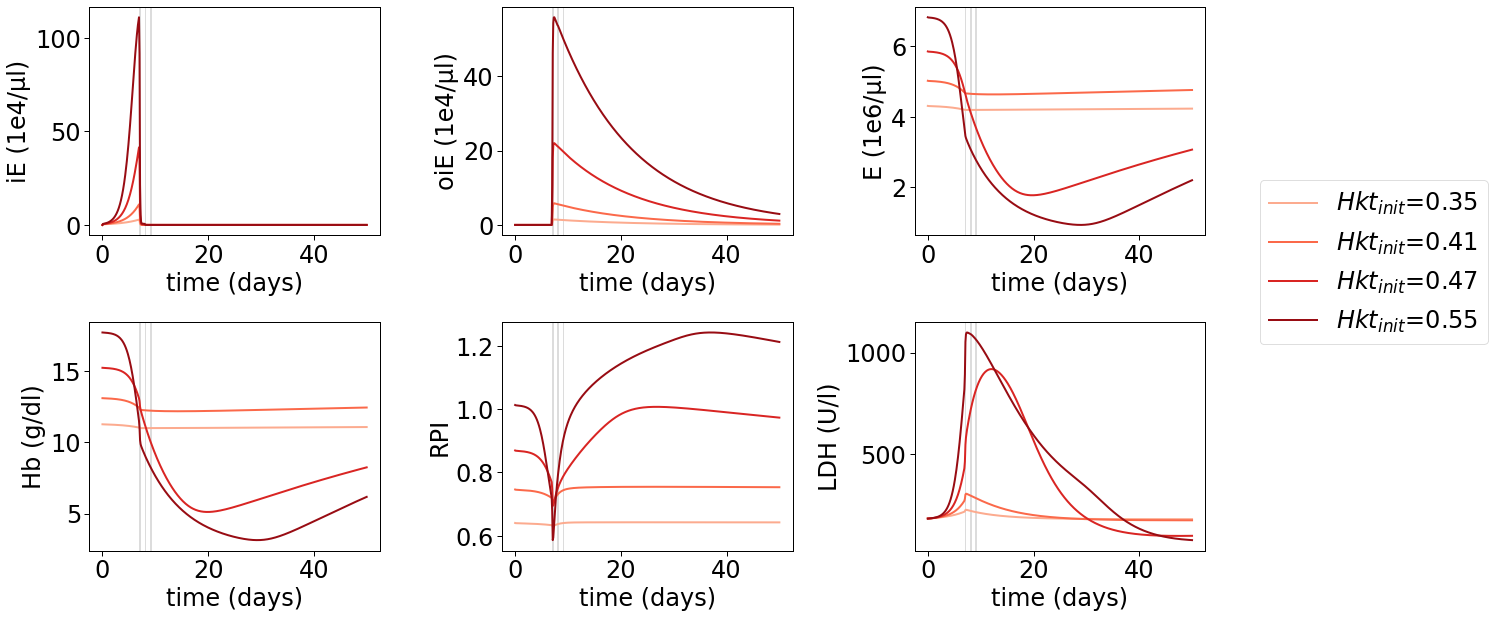

In [ ]:
species_to_analyze = OrderedDict({
    '[iE]': ['iE (1e4/µl)', 1e4],
    '[oiE]': ['oiE (1e4/µl)', 1e4],
    '[E]': ['E (1e6/µl)', 1e6],
    'Hb': ['Hb (g/dl)', 1],
    'RPI': ['RPI', 1],
    'LDH': ['LDH (U/l)',1],
})

# Definition der Parameter-Boundaries
params_bounds = OrderedDict({
    'Hkt_init': (0.35, 0.55), 
})


# Konvertiere bounds in logscale
params_bounds_log = pf.convert_bounds_to_logscale(params_bounds)

# Anzahl der Werte pro Parameter 
num_values_per_param = 4

# Erzeugung der Wertemengen für jeden Parameter
param_values = {}
for param, bounds in params_bounds_log.items():
    param_values[param] = np.linspace(bounds[0], bounds[1], num_values_per_param)

# Durchführung des Parameter-Scans und Erstellung der Plots
fig, axs = plt.subplots(2,3, figsize=(20,10))
fig.subplots_adjust(hspace=0.38, wspace= 0.42)
size_of_font = 24

# Farbübergang
cmap = plt.colormaps.get_cmap('Reds')
color_start = 0.3

for i, (param, values) in enumerate(param_values.items()):
    for idx, value in enumerate(values):
        model = te.loada('.././model/OIE_model.ant')

        model_str = model.getAntimony()        #lade Antimony string
        model_lines = model_str.split('\n')    #splitte in für jede Zeile
        new_model_lines = []

        for line in model_lines:         #gehe alle zeielen durch, ändere wnn parameter geändert werden soll, füge in neuen strig zu
            if line.startswith(f'{param}=') or line.startswith(f'{param} '):   # if line.startswith(param):
                line = f'{param}={10**value}'
            new_model_lines.append(line)
        new_model_str = '\n'.join(new_model_lines)    
        model = te.loada(new_model_str) 

        result = model.simulate(0, 50, 500, ['time']+list(species_to_analyze.keys()))
        
        for j, specie in enumerate (species_to_analyze.keys()):

            row = j //3
            col = j % 3

            axs[row][col].plot(result['time'], result[specie]/species_to_analyze[specie][1], label=f'$Hkt_{{init}}$={round(10**value,2):.2f}', color=cmap(color_start + idx * (00.8 / num_values_per_param)))
            axs[row][col].set_xlabel('time (days)',fontsize= size_of_font)
            axs[row][col].set_ylabel(species_to_analyze[specie][0],fontsize= size_of_font)
            axs[row, col].tick_params(labelsize=size_of_font)

            axs[row][col].axvspan(7, 7.3, facecolor='gainsboro', alpha=1, linewidth=2) #, label='ACT Administration')
            axs[row][col].axvspan(8, 8.3, facecolor='gainsboro', alpha=1, linewidth=2)
            axs[row][col].axvspan(9, 9.3, facecolor='gainsboro', alpha=1, linewidth=2)
            
        handles, labels = axs[row][col].get_legend_handles_labels()  # Legend Box outsides Subplots
axs[1][1].legend(handles, labels, loc='lower center', bbox_to_anchor=(3.0, 0.85),fontsize= size_of_font) #bbox (nach rechts-links, oben-unten, negativ yes) (0.5, -0.9)

plt.savefig("./figures/paramscan_Hkt_init.pdf", format="pdf",bbox_inches='tight')

plt.show()



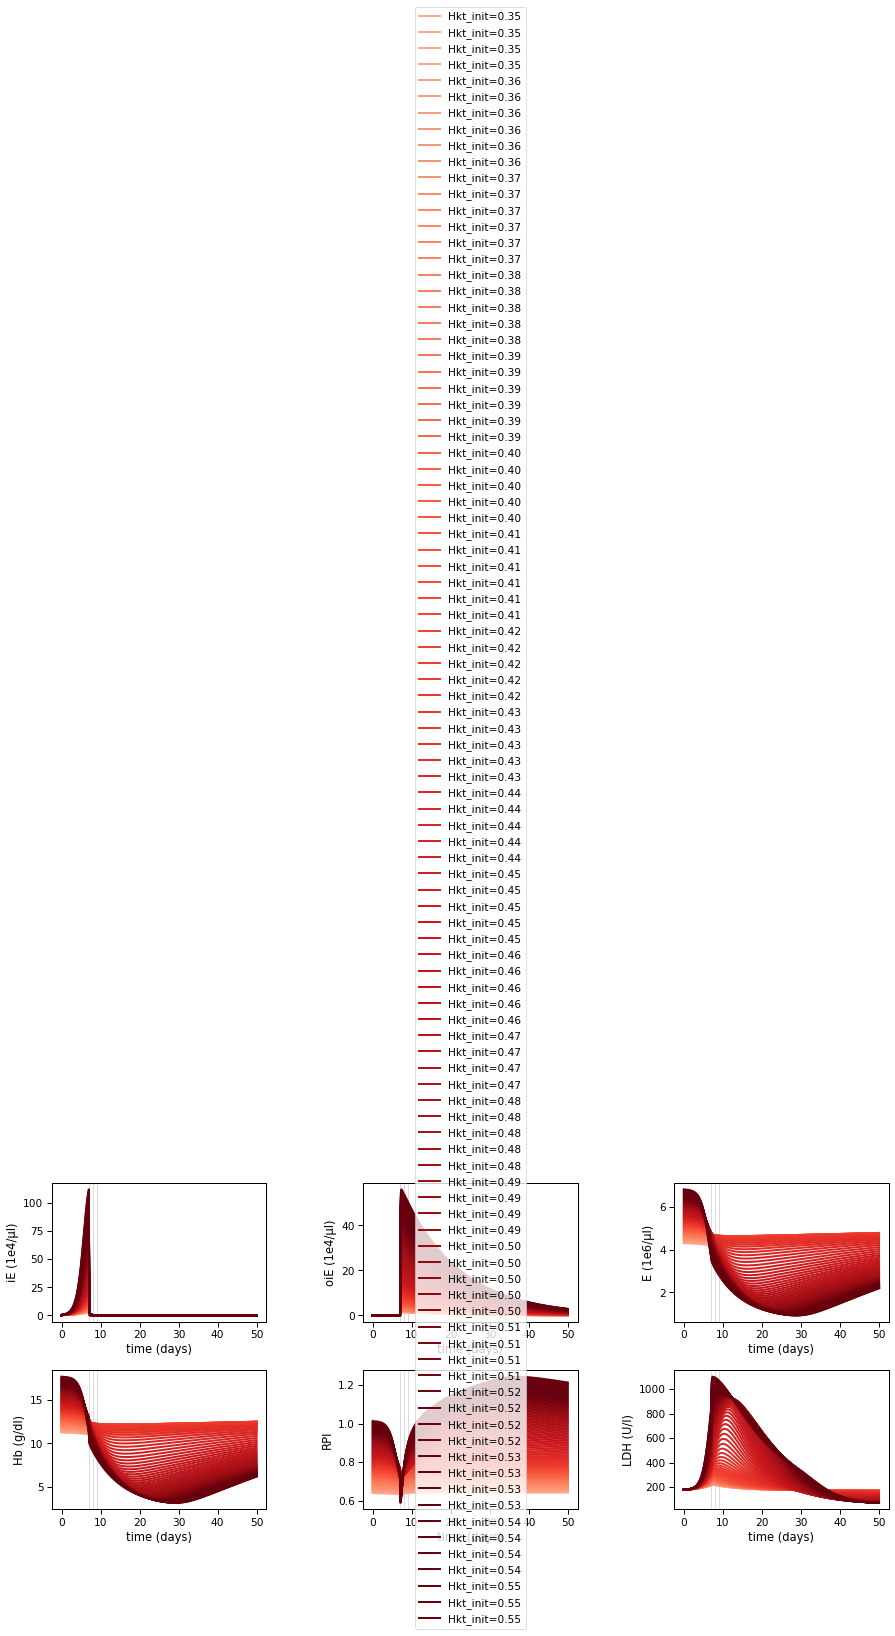

[<matplotlib.lines.Line2D object at 0x7f4353083a00>, <matplotlib.lines.Line2D object at 0x7f4351307040>, <matplotlib.lines.Line2D object at 0x7f4351332320>, <matplotlib.lines.Line2D object at 0x7f4351359840>, <matplotlib.lines.Line2D object at 0x7f4351380d60>, <matplotlib.lines.Line2D object at 0x7f43513ac280>, <matplotlib.lines.Line2D object at 0x7f43513af760>, <matplotlib.lines.Line2D object at 0x7f43511eac80>, <matplotlib.lines.Line2D object at 0x7f43512261a0>, <matplotlib.lines.Line2D object at 0x7f43512596c0>, <matplotlib.lines.Line2D object at 0x7f4351290be0>, <matplotlib.lines.Line2D object at 0x7f43512cc100>, <matplotlib.lines.Line2D object at 0x7f43512cf5e0>, <matplotlib.lines.Line2D object at 0x7f435110eb00>, <matplotlib.lines.Line2D object at 0x7f4351146020>, <matplotlib.lines.Line2D object at 0x7f435117d540>, <matplotlib.lines.Line2D object at 0x7f43511b8a60>, <matplotlib.lines.Line2D object at 0x7f43511bbf40>, <matplotlib.lines.Line2D object at 0x7f4350ffb460>, <matplotlib

In [ ]:
species_to_analyze = OrderedDict({
    '[iE]': ['iE (1e4/µl)', 1e4],
    '[oiE]': ['oiE (1e4/µl)', 1e4],
    '[E]': ['E (1e6/µl)', 1e6],
    'Hb': ['Hb (g/dl)', 1],
    'RPI': ['RPI', 1],
    'LDH': ['LDH (U/l)',1],
})

# Definition der Parameter-Boundaries
params_bounds = OrderedDict({
    'Hkt_init': (0.35, 0.55), 
})


# Konvertiere bounds in logscale
params_bounds_log = pf.convert_bounds_to_logscale(params_bounds)

# Anzahl der Werte pro Parameter 
num_values_per_param = 100

# Erzeugung der Wertemengen für jeden Parameter
param_values = {}
for param, bounds in params_bounds_log.items():
    param_values[param] = np.linspace(bounds[0], bounds[1], num_values_per_param)

# Durchführung des Parameter-Scans und Erstellung der Plots
fig, axs = plt.subplots(2,3, figsize=(15, 6))
fig.subplots_adjust(hspace=0.35, wspace= 0.45)

# Farbübergang
cmap = plt.colormaps.get_cmap('Reds')
color_start = 0.3
df_list = []


readouts = {
    "max":np.max,
    "min":np.min,
}
for i, (param, values) in enumerate(param_values.items()):
   

    for idx, value in enumerate(values):
        model = te.loada('.././model/OIE_model.ant')

        
        

        model_str = model.getAntimony()        #lade Antimony string
        model_lines = model_str.split('\n')    #splitte in für jede Zeile
        new_model_lines = []

        for line in model_lines:         #gehe alle zeielen durch, ändere wnn parameter geändert werden soll, füge in neuen strig zu
            if line.startswith(f'{param}=') or line.startswith(f'{param} '):   # if line.startswith(param):
                line = f'{param}={10**value}'
            new_model_lines.append(line)
        new_model_str = '\n'.join(new_model_lines)    
        model = te.loada(new_model_str)
        t_start = 0
        t_end = 50
        n_steps = 500+1 

        result = model.simulate(t_start, t_end, n_steps, ['time']+list(species_to_analyze.keys()))
        t_add = int(np.ceil(n_steps/(t_end - t_start) * model.t_ART_add))

        readouts["refri"] = lambda x:x[t_add]

        for k in species_to_analyze.keys():
            for rn,f in readouts.items():
                df_list.append({
                    "readout_name":rn,
                    "parameter_value":10**value,
                    "exponent":value,
                    "parameter_name":param,
                    "species_name":k,
                    "value":f(result[k])
                })


        for j, specie in enumerate (species_to_analyze.keys()):

            row = j //3
            col = j % 3

            axs[row][col].plot(result['time'], result[specie]/species_to_analyze[specie][1], label=f'{param}={round(10**value,2):.2f}', color=cmap(color_start + idx * (00.8 / num_values_per_param)))
            axs[row][col].set_xlabel('time (days)')
            axs[row][col].set_ylabel(species_to_analyze[specie][0])

            axs[row][col].axvspan(7, 7.3, facecolor='gainsboro', alpha=1, linewidth=2) #, label='ACT Administration')
            axs[row][col].axvspan(8, 8.3, facecolor='gainsboro', alpha=1, linewidth=2)
            axs[row][col].axvspan(9, 9.3, facecolor='gainsboro', alpha=1, linewidth=2)
            
        handles, labels = axs[row][col].get_legend_handles_labels()  # Legend Box outsides Subplots
   

axs[1][1].legend(handles, labels, loc='lower center', bbox_to_anchor=(0.5, -0.9),) #bbox (nach rechts-links, oben-unten, negativ yes)
plt.show()

print(handles, labels)

#plt.savefig("plot.pdf")

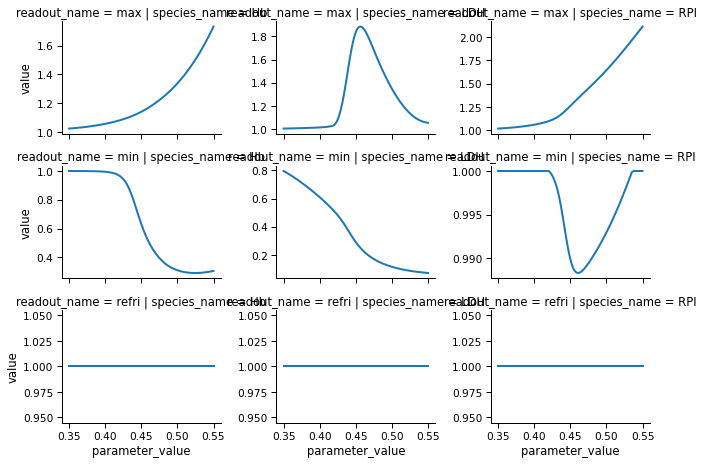

In [ ]:
df = pd.DataFrame(df_list)
df = df.loc[df["species_name"].isin(["Hb","LDH","RPI"])]
def norm(sdf):

    ref = sdf.loc[sdf["readout_name"] == "refri","value"].values
    def norm2(x):

        x["value"]  = x["value"]/ref
        return x[["value","parameter_value","readout_name"]]

    sdf = sdf.groupby(["readout_name"]).apply(norm2)
    return sdf


df =  df.groupby(["parameter_name","species_name"],as_index=True).apply(norm).reset_index()
#import seaborn as sns
df

g = sns.FacetGrid(col = "species_name",row = "readout_name", data=df,sharey=False,height=2.2,aspect=2**0.5)
g.map_dataframe(sns.lineplot,x = 'parameter_value', y = "value")
plt.tight_layout()


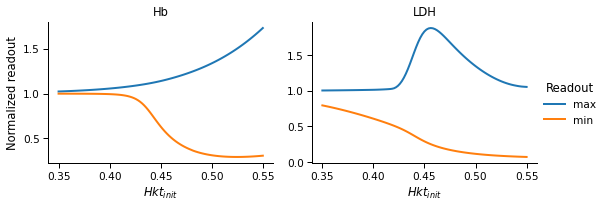

In [ ]:
df = pd.DataFrame(df_list)
#df = df.loc[df["species_name"].isin(["Hb","LDH","RPI"])]
df = df.loc[df["species_name"].isin(["Hb","LDH"])]


def norm(sdf):

    ref = sdf.loc[sdf["readout_name"] == "refri","value"].values

    def norm2(x):
        x["value"]  = x["value"]/ref
        return x[["value","parameter_value","exponent","readout_name"]]
    sdf = sdf.groupby(["readout_name"]).apply(norm2)
    return sdf


df =  df.groupby(["parameter_name","species_name"],as_index=True).apply(norm).reset_index()
df = df.loc[df["readout_name"].isin(["max","min"])]
#df = df.replace({"min":"normalized min","max":"normalized max"})
#import seaborn as sns
df

sns.set_context("paper",font_scale=1.2,rc = {"lines.linewidth": 2})
g = sns.FacetGrid(col = "species_name", data=df,sharey=False,height=3,aspect=1.3)
g.map_dataframe(sns.lineplot,x = 'parameter_value', y = "value",hue = "readout_name")
g.add_legend(title = "Readout")
g.set_titles("{col_name}")
ax = g.axes
ax[0][0].set_ylabel("Normalized readout")
for a in ax[0]:
    a.set_xlabel("$Hkt_{init}$")
#plt.tight_layout()

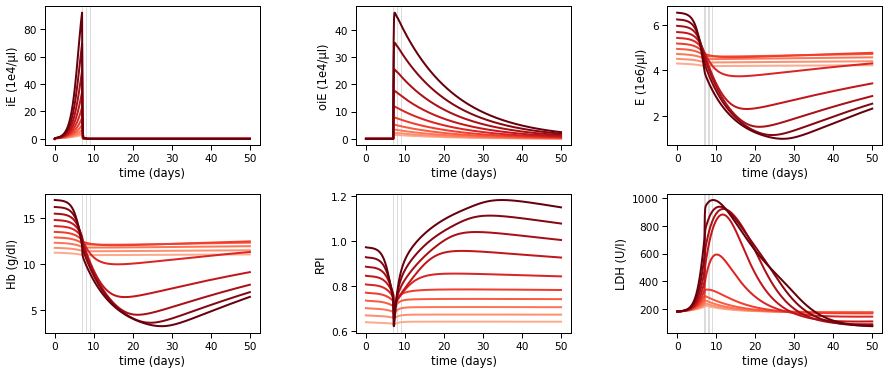

[<matplotlib.lines.Line2D object at 0x7f4352a36dd0>, <matplotlib.lines.Line2D object at 0x7f4352a37d00>, <matplotlib.lines.Line2D object at 0x7f43571681f0>, <matplotlib.lines.Line2D object at 0x7f43526bea40>, <matplotlib.lines.Line2D object at 0x7f4352a707f0>, <matplotlib.lines.Line2D object at 0x7f43575201c0>, <matplotlib.lines.Line2D object at 0x7f43576b9510>, <matplotlib.lines.Line2D object at 0x7f4357610190>, <matplotlib.lines.Line2D object at 0x7f4351eda4a0>, <matplotlib.lines.Line2D object at 0x7f43536c0820>] ['Hkt_init=0.35', 'Hkt_init=0.37', 'Hkt_init=0.38', 'Hkt_init=0.40', 'Hkt_init=0.42', 'Hkt_init=0.44', 'Hkt_init=0.46', 'Hkt_init=0.48', 'Hkt_init=0.50', 'Hkt_init=0.53']


In [ ]:
species_to_analyze = OrderedDict({
    '[iE]': ['iE (1e4/µl)', 1e4],
    '[oiE]': ['oiE (1e4/µl)', 1e4],
    '[E]': ['E (1e6/µl)', 1e6],
    'Hb': ['Hb (g/dl)', 1],
    'RPI': ['RPI', 1],
    'LDH': ['LDH (U/l)',1],
})

PADH_FluPa = ['k_BH_max', 'J_E_death']

# Definition der Parameter-Boundaries
params_bounds = OrderedDict({
    'Hkt_init': (0.35, 0.55), 
})


# Konvertiere bounds in logscale
params_bounds_log = pf.convert_bounds_to_logscale(params_bounds)

# Anzahl der Werte pro Parameter 
num_values_per_param = 100

# Erzeugung der Wertemengen für jeden Parameter
param_values = {}
for param, bounds in params_bounds_log.items():
    param_values[param] = np.linspace(bounds[0], bounds[1], num_values_per_param)

# Durchführung des Parameter-Scans und Erstellung der Plots
fig, axs = plt.subplots(2,3, figsize=(15, 6))
fig.subplots_adjust(hspace=0.35, wspace= 0.45)

# Farbübergang
cmap = plt.colormaps.get_cmap('Reds')
color_start = 0.3
df_list = []


def speciesvalue_tadd(species, t_add = None,**kwargs):
    return species[t_add]

def species_max(species,**kwargs):
    return np.max(species)

def species_max_PADH(species, t_PADH = None,**kwargs):
    return np.max(species[t_PADH:])

def species_min(species,**kwargs):
    return np.min(species)

def species_min_PADH(species, t_PADH = None,**kwargs):
    return np.min(species[t_PADH:])


readouts = {
    "max":species_max,
    "max_padh":species_max_PADH,
    "min":species_min,
    "min_padh":species_min_PADH,
    "ref_value": speciesvalue_tadd,
}
for i, (param, values) in enumerate(param_values.items()):
   

    for idx, param_value in enumerate( values):
        model = te.loada('.././model/OIE_model.ant')

        
        model_str = model.getAntimony()        #lade Antimony string
        model_lines = model_str.split('\n')    #splitte in für jede Zeile
        new_model_lines = []

        for line in model_lines:         #gehe alle zeielen durch, ändere wnn parameter geändert werden soll, füge in neuen strig zu
            if line.startswith(f'{param}=') or line.startswith(f'{param} '):   # if line.startswith(param):
                line = f'{param}={10**param_value}'
            new_model_lines.append(line)
        new_model_str = '\n'.join(new_model_lines)    
        model = te.loada(new_model_str)
        t_start = 0
        t_end = 50
        n_steps = 500+1 

        result = model.simulate(t_start, t_end, n_steps, ['time']+list(species_to_analyze.keys())+PADH_FluPa)
        t_add = int(np.floor(n_steps/(t_end - t_start) * model.t_ART_add))
        t_PADH = int(np.floor(n_steps/(t_end - t_start) * (model.t_ART_add+8)))


        for k in species_to_analyze.keys():
            for rn,f in readouts.items():
                df_list.append({
                    "readout_name":rn,
                    "parameter_value":10**param_value,
                    "exponent":param_value,
                    "parameter_name":param,
                    "species_name":k,
                    "value":f(result[k],t_add = t_add, t_PADH = t_PADH)
                
                })

        if idx % 10 == 0:
            for j, specie in enumerate (species_to_analyze.keys()):

                row = j //3
                col = j % 3

                axs[row][col].plot(result['time'], result[specie]/species_to_analyze[specie][1], label=f'{param}={round(10**param_value,2):.2f}', color=cmap(color_start + idx * (00.8 / num_values_per_param)))
                axs[row][col].set_xlabel('time (days)')
                axs[row][col].set_ylabel(species_to_analyze[specie][0])

                axs[row][col].axvspan(7, 7.3, facecolor='gainsboro', alpha=1, linewidth=2) #, label='ACT Administration')
                axs[row][col].axvspan(8, 8.3, facecolor='gainsboro', alpha=1, linewidth=2)
                axs[row][col].axvspan(9, 9.3, facecolor='gainsboro', alpha=1, linewidth=2)
            
        handles, labels = axs[row][col].get_legend_handles_labels()  # Legend Box outsides Subplots
   

#axs[1][1].legend(handles, labels, loc='lower center', bbox_to_anchor=(0.5, -0.9),) #bbox (nach rechts-links, oben-unten, negativ yes)
plt.show()

print(handles, labels)

#plt.savefig("plot.pdf")

In [ ]:
df = pd.DataFrame(df_list)

mdf = df.pivot_table(values = ["value"], columns= ["readout_name","parameter_name","species_name",], index = 'parameter_value')
mdf = mdf.droplevel(level = [0],axis = 1)

def norm(df, ref_value):
    df =  ((df.droplevel(level = 0,axis = 1) - ref_value)/ref_value)*100
    return df


mdf2 = mdf.loc[:,(slice(None),slice(None),["Hb","LDH"],)]
mdf2 = mdf2.groupby(level = [0],axis = 1).apply(norm, mdf2.loc[:, ("ref_value",)])
df = mdf2.melt(ignore_index = False)
df["parameter_value"] = df.index
df.index = pd.RangeIndex(len(df))

df = df.loc[
    ((df["species_name"] == "Hb") & (df["readout_name"] == "min_padh"))|
    ((df["species_name"] == "LDH") & (df["readout_name"] == "max_padh"))
]

df

,readout_name,parameter_name,species_name,value,parameter_value
300,max_padh,Hkt_init,LDH,-11.259061,0.350000
301,max_padh,Hkt_init,LDH,-11.483594,0.351602
302,max_padh,Hkt_init,LDH,-11.712056,0.353210
303,max_padh,Hkt_init,LDH,-11.944556,0.354827
304,max_padh,Hkt_init,LDH,-12.180686,0.356450
...,...,...,...,...,...
695,min_padh,Hkt_init,Hb,-72.725682,0.540047
696,min_padh,Hkt_init,Hb,-72.621423,0.542518
697,min_padh,Hkt_init,Hb,-72.496714,0.545001
698,min_padh,Hkt_init,Hb,-72.352046,0.547495


Float64Index([0.43376892030259584, 0.5327007032712806], dtype='float64', name='parameter_value')


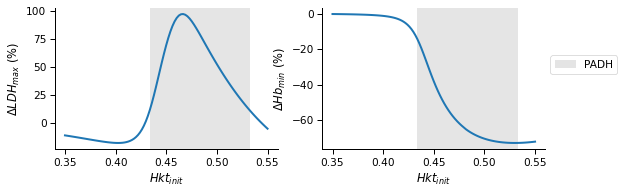

In [ ]:
sns.set_context("paper",font_scale=1.2,rc = {"lines.linewidth": 2})
g = sns.FacetGrid(col = "species_name", data=df,sharey=False,height=3,aspect=1.3)
g.map_dataframe(sns.lineplot,x = 'parameter_value', y = "value")
g.add_legend(title = "Readout")


ax = g.axes
ax[0][0].set_ylabel("$\Delta LDH_{max}$ (%)")
ax[0][1].set_ylabel("$\Delta Hb_{min}$ (%)")

ax[0][0].set_title("")
ax[0][1].set_title("")

for a in ax[0]:
    a.set_xlabel("$Hkt_{init}$")
ldh = df.pivot(columns = ["species_name","readout_name"] , index= "parameter_value", values ="value")
X = np.array(ldh[("LDH","max_padh")] - 10)
Y = np.array(ldh[("Hb","min_padh")]  + 10)
px = np.sort(np.argsort(X**2)[:2])
py = np.sort(np.argsort(Y**2)[:1])

padh_limit = ldh[("LDH","max_padh")].index[[max(px[0],py[0]),px[1]]]
print(padh_limit)

for a in np.ravel(ax):
    h = a.axvspan(padh_limit[0],padh_limit[1], alpha=0.2, linewidth=0, color = "tab:grey", zorder = -1)

handles, labels = a.get_legend_handles_labels()
g.legend.remove()
handles.append(h)
labels.append("PADH")
a.legend(handles = handles,labels = labels, bbox_to_anchor = (1, 0.7))


plt.savefig("./figures/paramscan_Hktinit_PADHcheck.pdf", format="pdf",bbox_inches='tight')

plt.show()

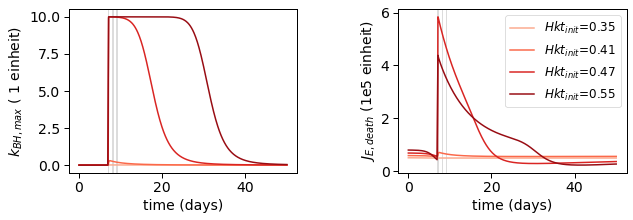

In [ ]:
species_to_analyze = OrderedDict({
    'k_BH_max': ['k_BH_max einheit', 1],
    'J_E_death':['J_E_death einheit', 1e5]
})

# Definition der Parameter-Boundaries
params_bounds = OrderedDict({
    'Hkt_init': (0.35, 0.55), 
})

# Konvertiere bounds in logscale
params_bounds_log = pf.convert_bounds_to_logscale(params_bounds)

# Anzahl der Werte pro Parameter 
num_values_per_param = 4

# Erzeugung der Wertemengen für jeden Parameter
param_values = {}
for param, bounds in params_bounds_log.items():
    param_values[param] = np.linspace(bounds[0], bounds[1], num_values_per_param)

# Adjust figure size for paper
fig, axs = plt.subplots(1,2, figsize=(10,3)) #
fig.subplots_adjust(hspace=0.38, wspace=0.44)

# Adjust font size for paper
size_of_font = 14

cmap = plt.colormaps.get_cmap('Reds')
color_start = 0.3

for i, (param, values) in enumerate(param_values.items()):
    for idx, value in enumerate(values):

        model = te.loada('.././model/OIE_model.ant')

        model_str = model.getAntimony()        #lade Antimony string
        model_lines = model_str.split('\n')    #splitte in für jede Zeile
        new_model_lines = []

        for line in model_lines:         #gehe alle zeielen durch, ändere wnn parameter geändert werden soll, füge in neuen strig zu
            if line.startswith(f'{param}=') or line.startswith(f'{param} '):   # if line.startswith(param):
                line = f'{param}={10**value}'
            new_model_lines.append(line)
        new_model_str = '\n'.join(new_model_lines)    
        model = te.loada(new_model_str) 

        result = model.simulate(0, 50, 500, ['time']+list(species_to_analyze.keys()))
        
        for j, specie in enumerate(species_to_analyze.keys()):
            col = j % 2

            axs[col].plot(result['time'], result[specie]/species_to_analyze[specie][1], label=f'$Hkt_{{init}}$={round(10**value,2):.2f}', color=cmap(color_start + idx * (0.8 / num_values_per_param)), linewidth=1.5)


            axs[col].set_xlabel('time (days)',fontsize=size_of_font)

            axs[0].set_ylabel( '$k_{{BH,max}}$ ( 1 einheit)',fontsize=size_of_font)
            axs[1].set_ylabel( '$J_{{E,death}}$ (1e5 einheit)',fontsize=size_of_font)


            axs[col].tick_params(labelsize=size_of_font)
            axs[col].axvspan(7, 7.3, facecolor='gainsboro', alpha=1, linewidth=1.2)
            axs[col].axvspan(8, 8.3, facecolor='gainsboro', alpha=1, linewidth=1.2)
            axs[col].axvspan(9, 9.3, facecolor='gainsboro', alpha=1, linewidth=1.2)

        handles, labels = axs[col].get_legend_handles_labels()
        
# Adjusted legend position and size
axs[1].legend(handles, labels, loc='upper right', fontsize=size_of_font - 2)

# Save the figure in high resolution for paper
plt.savefig("./figures/paramscan_Hkt_init_BHrates.pdf", format="pdf", dpi=200, bbox_inches='tight')
plt.show()


## Vergleich Simulation & Patient Data

### non PADH Simulation vs Patient Data 59

Index(['time', 'Hkt', '[E]', 'Hb', 'LDH', '[R]', '[oiE]', '[iE]', 'RPI'], dtype='object')


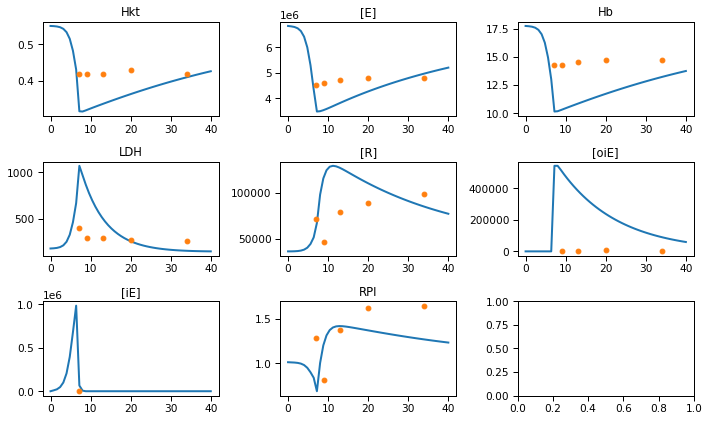

In [ ]:


lab_values = pf.get_lab_values()
additional_values = ['[iE]','RPI']
all_values = lab_values + additional_values

#with open ('20230712-16-08-09paras_optimized.json', 'r') as jsonfile:    #r= only read
#    optimize_results_file = json.load(jsonfile, object_pairs_hook=OrderedDict)

#Model Daten
ant_model = '.././model/OIE_model.ant'
ant_model = te.loada(ant_model)
#ant_model.BH_max = 0
#ant_model.t_ART_add = 7
#ant_model.param1_Pdeath = 5e-2

patient = '59'

params = OrderedDict({
    'BH_max': 0,        # höher als 3 sonst Reinfetion
    'param1_Pdeath':5e-2,  #sigmoid (1e-2,1e3),     # aus fitting rauslasen zu wenig einfluss    2e-5,0.01
    't_ART_add': 7,
    #'k_E_infect': 0.8e-6
})



model_str = model.getAntimony()        #lade Antimony string
model_lines = model_str.split('\n')    #splitte in für jede Zeile
new_model_lines = []

for line in model_lines:         #gehe alle zeielen durch, ändere wnn parameter geändert werden soll, füge in neuen strig zu
    for param, value in params.items():
        if line.startswith(f'{param}=') or line.startswith(f'{param} '):   # if line.startswith(param):
            line = f'{param}={params[param]}'
    new_model_lines.append(line)
new_model_str = '\n'.join(new_model_lines)    
ant_model = te.loada(new_model_str) 
#





#experimentelle Daten
data_df = pd.read_excel('.././datasets/haemolysismodel_conRetis.xlsx')   
df = dsl.long_format(data_df)
df_experimental_data = pf.preprocess_experimental_df(df, patient, all_values)
#Optimization 

res = ant_model.simulate(0, 40, selections=['time']+ all_values)
df_simulated_data = pd.DataFrame(res, columns=res.colnames)
print(df_simulated_data.columns)
#df_simulated_data.set_index('time', inplace=True)
#df_simulated_data = pf.simulate_model(ant_model , pf.get_lab_values(),new_dict )

#Plotten
#print(f'score:{optimize_results_file["results"][index]["best_score"]}')
df_experimental_data['time'] = df_experimental_data.index + ant_model.t_ART_add

n_subplots = len(all_values)
n_cols = 3
n_rows = int(np.ceil(n_subplots/n_cols))
    



fig, ax = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(10,6))

for i, lab_value in enumerate(all_values):
    col = i%n_cols
    row = i//n_cols
    ax[row, col].plot(df_simulated_data.time, df_simulated_data[lab_value])
    if lab_value in df_experimental_data.columns:   
        ax[row, col].plot(df_experimental_data.time, df_experimental_data[lab_value],'o')
    ax[row, col].set_title(lab_value)
    


    plt.tight_layout()
    



#df_simulated_data
# for axi in fig.axes:
#     axi.set_xlim(5, 10)

plt.show()

### non PADH Simulation vs Patient Data 59

1.1197520220833472 0.42460449024399527 0.9916315417490201
Index(['time', 'Hkt', '[E]', 'Hb', 'LDH', '[R]', '[oiE]', '[iE]', 'RPI',
       'R_percent', 't_R_aging'],
      dtype='object')


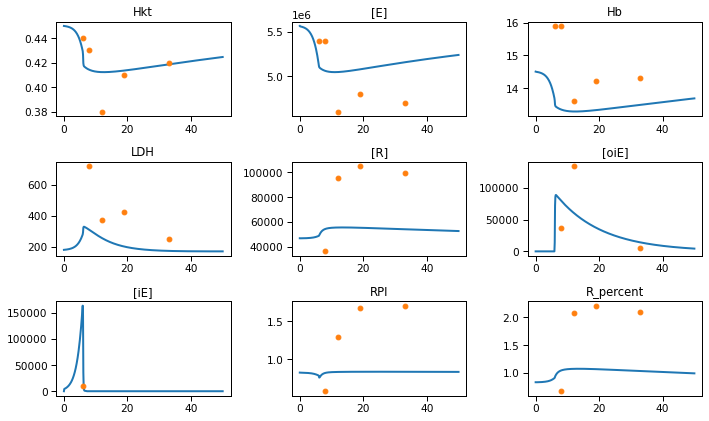

In [ ]:


lab_values = pf.get_lab_values()
additional_values = ['[iE]','RPI', 'R_percent']
all_values = lab_values + additional_values

#with open ('20230712-16-08-09paras_optimized.json', 'r') as jsonfile:    #r= only read
#    optimize_results_file = json.load(jsonfile, object_pairs_hook=OrderedDict)

#Model Daten
ant_model = '.././model/OIE_model.ant'
ant_model = te.loada(ant_model)
#ant_model.BH_max = 0
#ant_model.t_ART_add = 7
#ant_model.param1_Pdeath = 5e-2

patient = '36'

params = OrderedDict({
    'BH_max': 2.5,        # höher als 3 sonst Reinfetion
    #'param1_Pdeath':5e-2,  #sigmoid (1e-2,1e3),     # aus fitting rauslasen zu wenig einfluss    2e-5,0.01
    't_ART_add': 6,
    #'k_E_infect': 0.8e-6
})



model_str = ant_model.getAntimony()        #lade Antimony string
model_lines = model_str.split('\n')    #splitte in für jede Zeile
new_model_lines = []

for line in model_lines:         #gehe alle zeielen durch, ändere wnn parameter geändert werden soll, füge in neuen strig zu
    for param, value in params.items():
        if line.startswith(f'{param}=') or line.startswith(f'{param} '):   # if line.startswith(param):
            line = f'{param}={params[param]}'
    new_model_lines.append(line)
new_model_str = '\n'.join(new_model_lines)    
ant_model = te.loada(new_model_str) 
#





#experimentelle Daten
data_df = pd.read_excel('.././datasets/haemolysismodel_conRetis.xlsx')   
df = dsl.long_format(data_df)
df_experimental_data = pf.preprocess_experimental_df(df, patient, all_values)
#Optimization 

res = ant_model.simulate(0, 50, 500,  selections=['time']+ list(all_values)+['t_R_aging'])

print(
    ant_model.t_R_aging,
    ant_model.Hkt,
    ant_model.R_percent,
    )

df_simulated_data = pd.DataFrame(res, columns=res.colnames)
print(df_simulated_data.columns)
#df_simulated_data.set_index('time', inplace=True)
#df_simulated_data = pf.simulate_model(ant_model , pf.get_lab_values(),new_dict )

#Plotten
#print(f'score:{optimize_results_file["results"][index]["best_score"]}')
df_experimental_data['time'] = df_experimental_data.index + ant_model.t_ART_add

n_subplots = len(all_values)
n_cols = 3
n_rows = int(np.ceil(n_subplots/n_cols))
    



fig, ax = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(10,6))

for i, lab_value in enumerate(all_values):
    col = i%n_cols
    row = i//n_cols
    ax[row, col].plot(df_simulated_data.time, df_simulated_data[lab_value])
    if lab_value in df_experimental_data.columns:   
        ax[row, col].plot(df_experimental_data.time, df_experimental_data[lab_value],'o')
    ax[row, col].set_title(lab_value)
    


    plt.tight_layout()
    



#df_simulated_data
# for axi in fig.axes:
#     axi.set_xlim(5, 10)

plt.show()

## Parameter Fitting 

### Fitted Model vs. PADH Patient 

#### Try to safe update function

In [20]:

size_of_font = 22

# Load model
ant_model = '.././model/OIE_model.ant'
ant_model = te.loada(ant_model)

# experimentel data
patient = '36'
data_df = pd.read_excel('.././datasets/haemolysismodel_conRetis.xlsx')   
df = dsl.long_format(data_df)
df_experimental_data = pf.preprocess_experimental_df(df, patient, pf.get_lab_values())

# Define lab and additional values
lab_values = ['[oiE]', '[E]', '[R]', 'Hb', 'Hkt', 'LDH'] # pf.get_lab_values()
additional_values = [] #['k_E_death', '[iE]', '[P]', 'J_P_death']
all_values = lab_values + additional_values

# define Units dictionary
units_dict = {'[iE]':1e4, '[oiE]':1e4, '[E]':1e6, 'Hb':1, '[P]':1, '[R]':1e4, 'Hkt': 1, 'LDH':1}

# Load optimization results
    #'20230707-16-12-18paras_optimized.json'
with open ('.././fitting/20230710-10-54-21paras_optimized.json', 'r') as jsonfile:    #r= only read
#with open ('20230707-17-53-05paras_optimized.json', 'r') as jsonfile:    #r= only read
    optimize_results_file = json.load(jsonfile, object_pairs_hook=OrderedDict)


# Update model with new parameters
new_dict = optimize_results_file["results"][0]["best_params"]

params = new_dict
model = ant_model
if not isinstance(params, OrderedDict):
        raise ValueError("Params must be an ordered dictionary")
    
model_str = model.getAntimony()
model_lines = model_str.split('\n')    #splitte in für jede Zeile

new_model_lines = []
for line in model_lines:
    for name, val in params.items():       # gehe alle zeielen durch, ändere wnn parameter geändert werden soll, füge in neuen strig zu
        if line.startswith(f'{name}=') or line.startswith(f'{name} '): 
            line = f'{name} = {10**val}'
            break
    new_model_lines.append(line)
new_model_str = '\n'.join(new_model_lines)  
#print(len(model_str),len(new_model_str))
print(len(model_str.split("\n")))
print(len(new_model_str.split("\n")))
#ant_model = update_model(ant_model, new_dict)

133
133


Hkt_init = 0.49961640465273377
M = 736.7033534112447
k_E_infect = 1.5421680908788012e-06
k_iE_rupture = 0.2815802758820532
k_M_death = 48.75073775783449
I0_death_iE = 6.20759593516397e-05
hill = 3.39367561424251
t_oiE_death = 6.0689750143541135
k_BH = 0.0003097363824872527
J_oiEdeath_0 = 5225.6353893013065
BH_max = 0.9052927252065246
t_ART_add = 6.8136269518812185
58677 4874
2.0


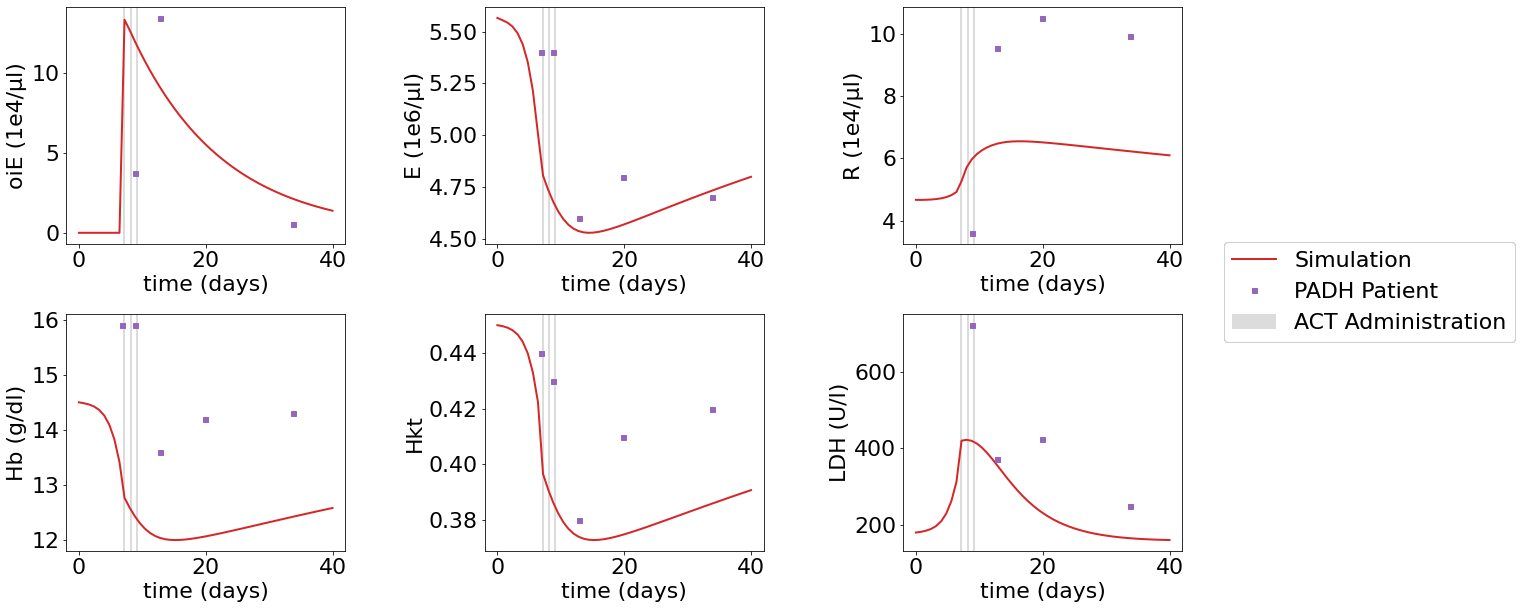

,Hkt,[E],Hb,LDH,[R],[oiE],time
time,,,,,,,
0,0.44,5400000.0,15.9,NaN,NaN,NaN,6.813627
2,0.43,5400000.0,15.9,721.0,36100.0,37406.749536,8.813627
6,0.38,4600000.0,13.6,372.0,95600.0,134464.875068,12.813627
13,0.41,4800000.0,14.2,424.0,105200.0,NaN,19.813627
27,0.42,4700000.0,14.3,249.0,99500.0,5687.000000,33.813627


In [ ]:

size_of_font = 22

# Load model
ant_model = '.././model/OIE_model.ant'
ant_model = te.loada(ant_model)

# experimentel data
patient = '36'
data_df = pd.read_excel('.././datasets/haemolysismodel_conRetis.xlsx')   
df = dsl.long_format(data_df)
df_experimental_data = pf.preprocess_experimental_df(df, patient, pf.get_lab_values())

# Define lab and additional values
lab_values = ['[oiE]', '[E]', '[R]', 'Hb', 'Hkt', 'LDH'] # pf.get_lab_values()
additional_values = [] #['k_E_death', '[iE]', '[P]', 'J_P_death']
all_values = lab_values + additional_values

# define Units dictionary
units_dict = {'[iE]':1e4, '[oiE]':1e4, '[E]':1e6, 'Hb':1, '[P]':1, '[R]':1e4, 'Hkt': 1, 'LDH':1}

# Load optimization results
    #'20230707-16-12-18paras_optimized.json'
with open ('.././fitting/20230710-10-54-21paras_optimized.json', 'r') as jsonfile:    #r= only read
#with open ('20230707-17-53-05paras_optimized.json', 'r') as jsonfile:    #r= only read
    optimize_results_file = json.load(jsonfile, object_pairs_hook=OrderedDict)


# Update model with new parameters
new_dict = optimize_results_file["results"][0]["best_params"]

def update_model(model, params=None):
    if params is not None:
        if not isinstance(params, OrderedDict):
                raise ValueError("Params must be an ordered dictionary")
            
        model_str = model.getAntimony()        #lade Antimony string
        model_lines = model_str.split('\n')    #splitte in für jede Zeile
        new_model_lines = []
        for line in model_lines:
            for name, val in params.items():       # gehe alle zeielen durch, ändere wnn parameter geändert werden soll, füge in neuen strig zu
                if line.startswith(f'{name}=') or line.startswith(f'{name} '): 
                    line = f'{name} = {10**val}'
                    print(line)
                new_model_lines.append(line)
        new_model_str = '\n'.join(new_model_lines)  
        print(len(new_model_str), len(model_str))  
        model = te.loada(new_model_str)         #lade überarbeiteten string
        return model
    

ant_model = pf.update_model(ant_model, new_dict)

# Simulate the model
res = ant_model.simulate(0, 40, selections=['time']+ all_values)
df_simulated_data = pd.DataFrame(res, columns=res.colnames)


print(ant_model.BH_max)

# Adjust time in experimental data
df_experimental_data['time'] = df_experimental_data.index + 10**new_dict['t_ART_add']

# Define number of rows and columns for the subplots
n_subplots = len(all_values)
n_cols = 3
n_rows = int(np.ceil(n_subplots/n_cols))

# Create subplots
fig, ax = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(20,10))  #15,8
fig.subplots_adjust(hspace=0.3 ,wspace= 0.5)

# Loop over all lab values and create a plot for each
for i, lab_value in enumerate(all_values):
    col = i%n_cols
    row = i//n_cols
    ax[row, col].plot(df_simulated_data.time, df_simulated_data[lab_value]/units_dict[lab_value], color = 'tab:red',  label = 'Simulation',  linewidth=2)
    if lab_value in df_experimental_data.columns:   
        ax[row, col].plot(df_experimental_data.time, df_experimental_data[lab_value]/units_dict[lab_value],'s',  markersize=5, color = 'tab:purple',  linewidth=2, label = 'PADH Patient')
    
    ax[row, col].axvspan(7, 7.3, facecolor='gainsboro', alpha=1, label='ACT Administration', linewidth=2)
    ax[row, col].axvspan(8, 8.3, facecolor='gainsboro', alpha=1,  linewidth=2)
    ax[row, col].axvspan(9, 9.3, facecolor='gainsboro', alpha=1,  linewidth=2)

    ax[row, col].tick_params(labelsize=size_of_font) # Größe Achseneinteilungen (zahlen)
    ax[row, col].set_xlabel('time (days)', fontsize= size_of_font)

    if lab_value == 'Hb': ax[row, col].set_ylabel('Hb (g/dl)', fontsize= size_of_font) 
    elif lab_value == '[R]': ax[row, col].set_ylabel('R (1e4/µl)', fontsize= size_of_font)
    elif lab_value == '[oiE]': ax[row, col].set_ylabel('oiE (1e4/µl)', fontsize= size_of_font)
    elif lab_value == '[E]': ax[row, col].set_ylabel('E (1e6/µl)', fontsize= size_of_font)   
    elif lab_value == 'iE': ax[row, col].set_ylabel('iE (1e4/µl)', fontsize= size_of_font) 
    elif lab_value == 'Hkt': ax[row, col].set_ylabel('Hkt', fontsize= size_of_font)   
    elif lab_value == 'LDH': ax[row, col].set_ylabel('LDH (U/l)', fontsize= size_of_font)   
    else: ax[row, col].set_ylabel(f'{lab_value} ({units_dict[lab_value]}/µl)', fontsize= size_of_font)
    
    ax[row, col].legend(fontsize = size_of_font, loc='upper right') # Größe legende

    handles, labels = ax[row, col].get_legend_handles_labels()  # Legend Box outsides Subplots
    fig.legend(handles, labels, loc='lower center',   bbox_to_anchor=(1.03, 0.4),  fontsize= size_of_font)
    #0.5, -0.11
    ax[row, col].get_legend().remove()  # entfernt Legende aus einzelnen Plots

plt.show()


df_experimental_data


#### longer comarison wih not fitted data 

6.81366406295111


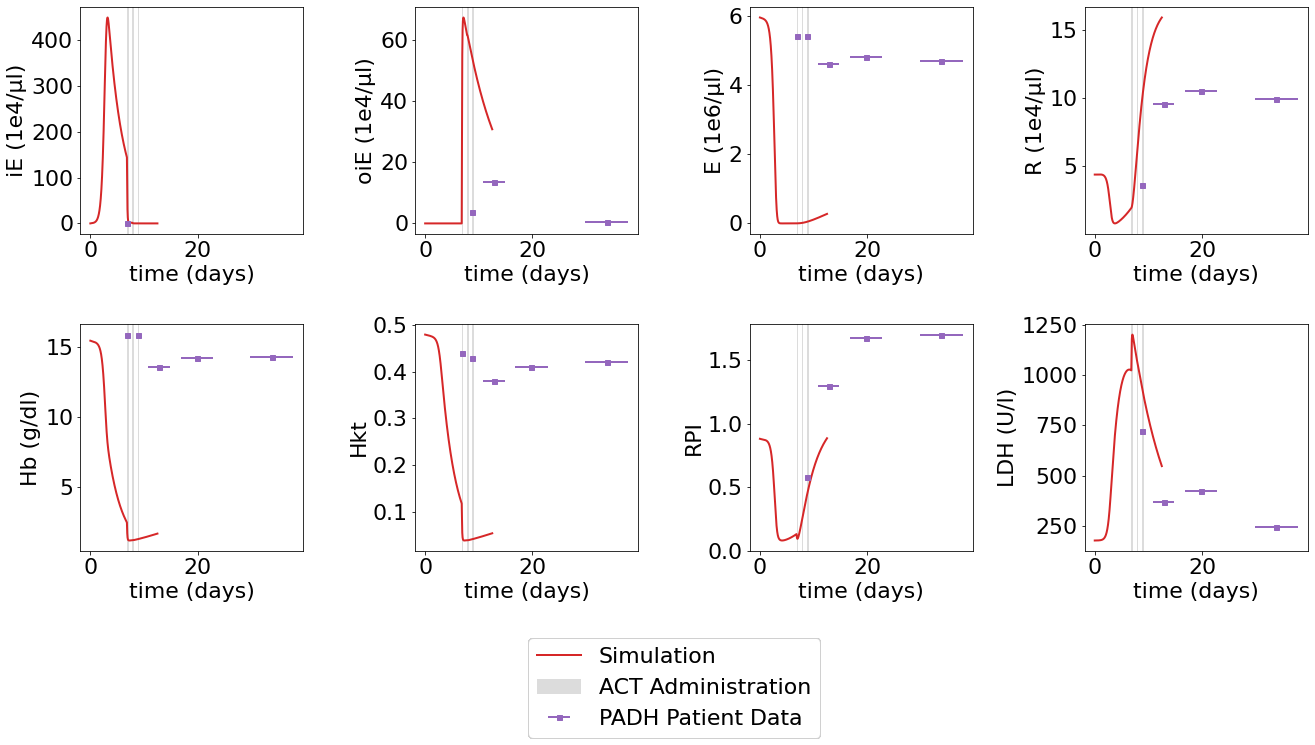

In [ ]:

size_of_font = 22



# Define lab and additional values
lab_values = ['[iE]','[oiE]', '[E]', '[R]', 'Hb', 'Hkt', 'RPI', 'LDH'] # pf.get_lab_values()
additional_values = [] #['k_E_death', '[iE]', '[P]', 'J_P_death']
all_values = lab_values + additional_values


# experimentel data
patient = '36'
data_df = pd.read_excel('.././datasets/haemolysismodel_conRetis.xlsx')   
df = dsl.long_format(data_df)
df_experimental_data = pf.preprocess_experimental_df(df, patient, lab_values)


# define Units dictionary
units_dict = {'[iE]':1e4, '[oiE]':1e4, '[E]':1e6, 'Hb':1, '[P]':1, '[R]':1e4, 'Hkt': 1, 'LDH':1, 'RPI':1} 

# Load optimization results
with open ('.././fitting/20230710-10-54-21paras_optimized.json', 'r') as jsonfile:    #r= only read
    optimize_results_file = json.load(jsonfile, object_pairs_hook=OrderedDict)

#new parameter
new_dict = optimize_results_file["results"][4]["best_params"]

# Update model with new parameters
ant_model = '.././model/OIE_model.ant'
ant_model = te.loada(ant_model)
#ant_model = pf.update_model(ant_model, new_dict)
ant_model = pf.update_model(ant_model, new_dict)


print(ant_model.t_ART_add)

# Simulate the model
res = ant_model.simulate(0, 12.5, 10000, selections=['time']+ all_values)
df_simulated_data = pd.DataFrame(res, columns=res.colnames)

# Adjust time in experimental data
df_experimental_data['time'] = df_experimental_data.index + 10**new_dict['t_ART_add']


# times uncertainty
time_uncertainty = [0,0,2,3,4]

# Define number of rows and columns for the subplots
n_subplots = len(all_values)
n_cols = 4
n_rows = int(np.ceil(n_subplots/n_cols))

# Create subplots
fig, ax = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(22,10))  #(20,15)  #15,8
fig.subplots_adjust(hspace=0.4 ,wspace= 0.5)

# Loop over all lab values and create a plot for each
for i, lab_value in enumerate(all_values):
    col = i%n_cols
    row = i//n_cols
    ax[row, col].plot(df_simulated_data.time, df_simulated_data[lab_value]/units_dict[lab_value], color = 'tab:red',  label = 'Simulation',  linewidth=2)
    if lab_value in df_experimental_data.columns:   
        #ax[row, col].plot(df_experimental_data.time, df_experimental_data[lab_value]/units_dict[lab_value] ,'s',  markersize=5, color = 'tab:purple',  linewidth=2, label = 'PADH Patient Data')
        ax[row, col].errorbar(df_experimental_data.time, df_experimental_data[lab_value]/units_dict[lab_value], xerr=time_uncertainty, fmt='s', markersize=5, color='tab:purple', linewidth=2, label='PADH Patient Data')
    #print(df_experimental_data)
     #xerr = time_uncertainty[df_experimental_data.index],

    time_ART_add = 10**new_dict['t_ART_add']
    ax[row, col].axvspan(time_ART_add, time_ART_add+0.3, facecolor='gainsboro', alpha=1, label='ACT Administration', linewidth=2)
    ax[row, col].axvspan(time_ART_add+1, time_ART_add+1.3, facecolor='gainsboro', alpha=1,  linewidth=2)
    ax[row, col].axvspan(time_ART_add+2, time_ART_add+2.3, facecolor='gainsboro', alpha=1,  linewidth=2)

    ax[row, col].tick_params(labelsize=size_of_font) # Größe Achseneinteilungen (zahlen)
    ax[row, col].set_xlabel('time (days)', fontsize= size_of_font)

    if lab_value == 'Hb': ax[row, col].set_ylabel('Hb (g/dl)', fontsize= size_of_font) 
    elif lab_value == '[R]': ax[row, col].set_ylabel('R (1e4/µl)', fontsize= size_of_font)
    elif lab_value == '[oiE]': ax[row, col].set_ylabel('oiE (1e4/µl)', fontsize= size_of_font)
    elif lab_value == '[E]': ax[row, col].set_ylabel('E (1e6/µl)', fontsize= size_of_font)   
    elif lab_value == '[iE]': ax[row, col].set_ylabel('iE (1e4/µl)', fontsize= size_of_font) 
    elif lab_value == 'Hkt': ax[row, col].set_ylabel('Hkt', fontsize= size_of_font)   
    elif lab_value == 'LDH': ax[row, col].set_ylabel('LDH (U/l)', fontsize= size_of_font)   
    elif lab_value == 'RPI': ax[row, col].set_ylabel('RPI', fontsize= size_of_font)  
    else: ax[row, col].set_ylabel(f'{lab_value} ({units_dict[lab_value]}/µl)', fontsize= size_of_font)
    
    ax[row, col].legend(fontsize = size_of_font, loc='upper right') # Größe legende

    handles, labels = ax[row, col].get_legend_handles_labels()  # Legend Box outsides Subplots
    fig.legend(handles, labels, loc='lower center',   bbox_to_anchor=(0.5, -0.15),  fontsize= size_of_font)
    #0.5, -0.11
    ax[row, col].get_legend().remove()  # entfernt Legende aus einzelnen Plots

plt.savefig("./figures/paramfit_PADH.pdf", format="pdf", bbox_inches='tight')
plt.show()




In [ ]:
#percent drop in PADH patient
df_experimental_data 

Hb_drop_patient = (df_experimental_data['Hb'][0]- df_experimental_data['Hb'].min()) / df_experimental_data['Hb'][0]

LDH_increase_patient = (df_experimental_data['LDH'][0]- df_experimental_data['Hb'].max()) / df_experimental_data['Hb'][0]

Hb_drop_patient, LDH_increase_patient


(0.14465408805031452,
          [iE]          [oiE]        [E]       [R]    Hb   Hkt       RPI  \
 time                                                                      
 0     10800.0            NaN  5400000.0       NaN  15.9  0.44       NaN   
 2         NaN   37406.749536  5400000.0   36100.0  15.9  0.43  0.582020   
 6         NaN  134464.875068  4600000.0   95600.0  13.6  0.38  1.294815   
 13        NaN            NaN  4800000.0  105200.0  14.2  0.41  1.677963   
 27        NaN    5687.000000  4700000.0   99500.0  14.3  0.42  1.704348   
 
         LDH       time  
 time                    
 0       NaN   6.813627  
 2     721.0   8.813627  
 6     372.0  12.813627  
 13    424.0  19.813627  
 27    249.0  33.813627  )

In [ ]:
# Hb Drop in simulation

desired_time = 10**new_dict['t_ART_add']
closest_time_row = df_simulated_data[df_simulated_data["time"] < desired_time]
hb_at_t_ART_add = closest_time_row['Hb'].iloc[-1]

#global min von Hb
global_minimum_hb = df_simulated_data['Hb'].min()
# difference between the two values
#normalisieren drop
hb_drop_percent = (hb_at_t_ART_add - global_minimum_hb)/ hb_at_t_ART_add

hb_drop_percent, hb_at_t_ART_add, global_minimum_hb


(0.3204828716082676, 13.191045242539582, 8.96354118369592)

In [ ]:
# LDH Increase

desired_time = 10**new_dict['t_ART_add']
closest_time_row = df_simulated_data[df_simulated_data["time"] < desired_time]
ldh_at_t_ART_add = closest_time_row['LDH'].iloc[-1]

# Find max of LDH which occurs at least 8 days after t_ART_add
post_interval_data = df_simulated_data[df_simulated_data["time"] >= desired_time + 8]

maximum_ldh_post_interval = post_interval_data['LDH'].max()

# Difference between the two values
ldh_increase = maximum_ldh_post_interval - ldh_at_t_ART_add

# Normalize increase
ldh_increase_norm = (ldh_increase/ ldh_at_t_ART_add)

ldh_increase_norm, ldh_at_t_ART_add, maximum_ldh_post_interval

(0.5709248129681025, 345.73573490100733, 543.1248446857544)

In [ ]:
# LDH Increase

desired_time = 10**new_dict['t_ART_add']
closest_time_row = df_simulated_data[df_simulated_data["time"] <= desired_time]
ldh_at_t_ART_add = closest_time_row['LDH'].iloc[-1]

# Identify the row that is closest to but not exceeding the desired time + 8
closest_post_interval_time_row = df_simulated_data[df_simulated_data["time"] < desired_time + 8].iloc[-1]

# Find max of LDH which occurs at least 8 days after t_ART_add
post_interval_data = df_simulated_data[df_simulated_data["time"] >= closest_post_interval_time_row['time']]
maximum_ldh_post_interval = post_interval_data['LDH'].max()

# Difference between the two values
ldh_increase = maximum_ldh_post_interval - ldh_at_t_ART_add

# Normalize increase
ldh_increase_norm = (ldh_increase/ ldh_at_t_ART_add)

ldh_increase_norm, ldh_at_t_ART_add, maximum_ldh_post_interval

(0.576859039019398, 345.73573490100733, 545.1765186906678)

### Fittet Model vs non PADH Patient

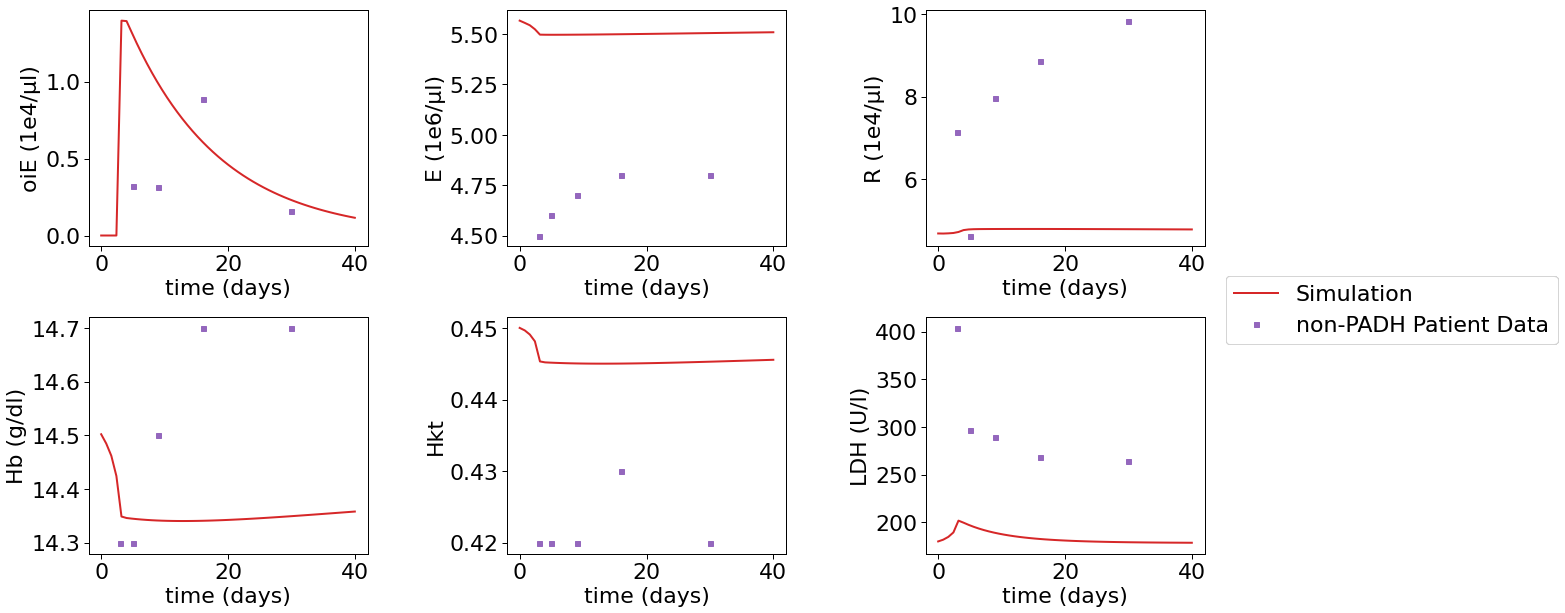

,Hkt,[E],Hb,LDH,[R],[oiE],time
time,,,,,,,
0,0.42,4500000.0,14.3,404.0,71300.0,NaN,3.000033
2,0.42,4600000.0,14.3,297.0,46200.0,3220.000000,5.000033
6,0.42,4700000.0,14.5,290.0,79600.0,3181.049065,9.000033
13,0.43,4800000.0,14.7,269.0,88700.0,8888.888880,16.000033
27,0.42,4800000.0,14.7,264.0,98500.0,1619.537280,30.000033


In [ ]:

size_of_font = 22

# Load model
ant_model = '.././model/OIE_model.ant'
ant_model = te.loada(ant_model)

# experimentel data
patient = '59'
data_df = pd.read_excel('.././datasets/haemolysismodel_conRetis.xlsx')
df = dsl.long_format(data_df)
df_experimental_data = pf.preprocess_experimental_df(df, patient, pf.get_lab_values())

# Define lab and additional values
lab_values = ['[oiE]', '[E]', '[R]', 'Hb', 'Hkt', 'LDH'] # pf.get_lab_values()
additional_values = [] #['k_E_death', '[iE]', '[P]', 'J_P_death']
all_values = lab_values + additional_values

# define Units dictionary
units_dict = {'[iE]':1e4, '[oiE]':1e4, '[E]':1e6, 'Hb':1, '[P]':1, '[R]':1e4, 'Hkt': 1, 'LDH':1}

# Load optimization results
    #'20230707-16-12-18paras_optimized.json'
with open ('.././fitting/20230712-11-25-46paras_optimized.json', 'r') as jsonfile:    #r= only read
#with open ('20230707-17-53-05paras_optimized.json', 'r') as jsonfile:    #r= only read
    optimize_results_file = json.load(jsonfile, object_pairs_hook=OrderedDict)


# Update model with new parameters
new_dict = optimize_results_file["results"][0]["best_params"]
ant_model = pf.update_model(ant_model, new_dict)

# Simulate the model
res = ant_model.simulate(0, 40, selections=['time']+ all_values)
df_simulated_data = pd.DataFrame(res, columns=res.colnames)

# Adjust time in experimental data
df_experimental_data['time'] = df_experimental_data.index + 10**new_dict['t_ART_add']

# Define number of rows and columns for the subplots
n_subplots = len(all_values)
n_cols = 3
n_rows = int(np.ceil(n_subplots/n_cols))

# Create subplots
fig, ax = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(20,10))  #15,8
fig.subplots_adjust(hspace=0.3 ,wspace= 0.5)

# Loop over all lab values and create a plot for each
for i, lab_value in enumerate(all_values):
    col = i%n_cols
    row = i//n_cols
    ax[row, col].plot(df_simulated_data.time, df_simulated_data[lab_value]/units_dict[lab_value], color = 'tab:red',  label = 'Simulation',  linewidth=2)
    if lab_value in df_experimental_data.columns:   
        ax[row, col].plot(df_experimental_data.time, df_experimental_data[lab_value]/units_dict[lab_value],'s',  markersize=5, color = 'tab:purple',  linewidth=2, label = 'non-PADH Patient Data')
    
    #ax[row, col].axvspan(7, 7.3, facecolor='gainsboro', alpha=1, label='ACT Administration', linewidth=2)
    #ax[row, col].axvspan(8, 8.3, facecolor='gainsboro', alpha=1,  linewidth=2)
    #ax[row, col].axvspan(9, 9.3, facecolor='gainsboro', alpha=1,  linewidth=2)

    ax[row, col].tick_params(labelsize=size_of_font) # Größe Achseneinteilungen (zahlen)
    ax[row, col].set_xlabel('time (days)', fontsize= size_of_font)

    if lab_value == 'Hb': ax[row, col].set_ylabel('Hb (g/dl)', fontsize= size_of_font) 
    elif lab_value == '[R]': ax[row, col].set_ylabel('R (1e4/µl)', fontsize= size_of_font)
    elif lab_value == '[oiE]': ax[row, col].set_ylabel('oiE (1e4/µl)', fontsize= size_of_font)
    elif lab_value == '[E]': ax[row, col].set_ylabel('E (1e6/µl)', fontsize= size_of_font)   
    elif lab_value == 'iE': ax[row, col].set_ylabel('iE (1e4/µl)', fontsize= size_of_font) 
    elif lab_value == 'Hkt': ax[row, col].set_ylabel('Hkt', fontsize= size_of_font)   
    elif lab_value == 'LDH': ax[row, col].set_ylabel('LDH (U/l)', fontsize= size_of_font)   
    else: ax[row, col].set_ylabel(f'{lab_value} ({units_dict[lab_value]}/µl)', fontsize= size_of_font)
    
    ax[row, col].legend(fontsize = size_of_font, loc='upper right') # Größe legende

    handles, labels = ax[row, col].get_legend_handles_labels()  # Legend Box outsides Subplots
    fig.legend(handles, labels, loc='lower center',   bbox_to_anchor=(1.03, 0.4),  fontsize= size_of_font)
    #0.5, -0.11
    ax[row, col].get_legend().remove()  # entfernt Legende aus einzelnen Plots

plt.show()

df_experimental_data

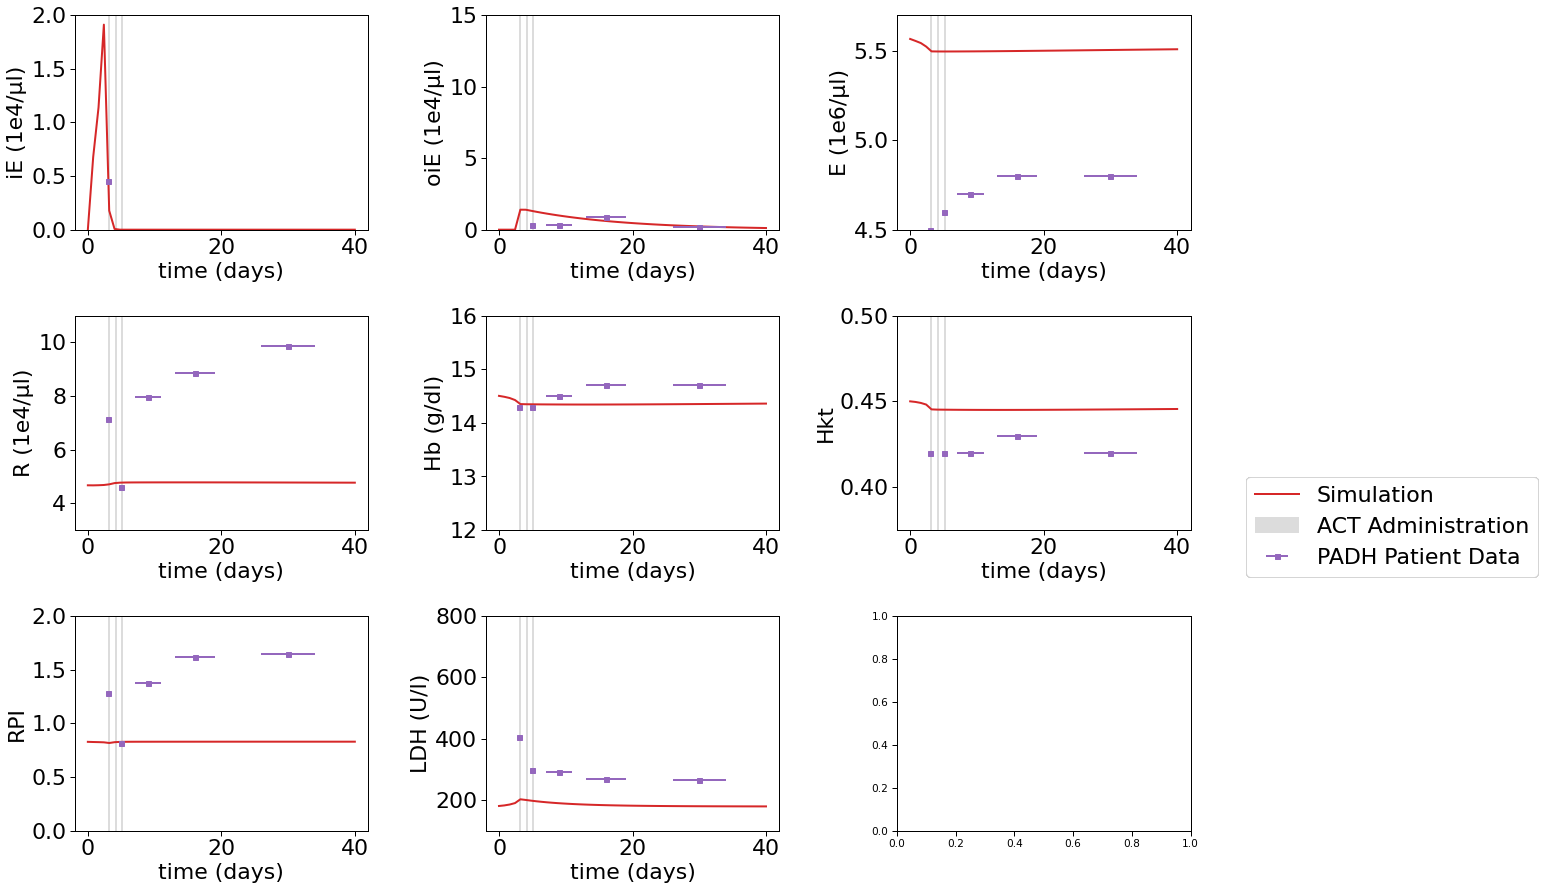

,[iE],[oiE],[E],[R],Hb,Hkt,RPI,LDH,time
time,,,,,,,,,
0,4500.0,NaN,4500000.0,71300.0,14.3,0.42,1.282319,404.0,3.000033
2,NaN,3220.000000,4600000.0,46200.0,14.3,0.42,0.811594,297.0,5.000033
6,NaN,3181.049065,4700000.0,79600.0,14.5,0.42,1.371594,290.0,9.000033
13,NaN,8888.888880,4800000.0,88700.0,14.7,0.43,1.615758,269.0,16.000033
27,NaN,1619.537280,4800000.0,98500.0,14.7,0.42,1.647536,264.0,30.000033


In [ ]:

size_of_font = 22



# Define lab and additional values
lab_values = ['[iE]','[oiE]', '[E]', '[R]', 'Hb', 'Hkt', 'RPI', 'LDH'] # pf.get_lab_values()
additional_values = [] #['k_E_death', '[iE]', '[P]', 'J_P_death']
all_values = lab_values + additional_values


# experimentel data
patient = '59'
data_df = pd.read_excel('.././datasets/haemolysismodel_conRetis.xlsx')   
df = dsl.long_format(data_df)
df_experimental_data = pf.preprocess_experimental_df(df, patient, lab_values)


# define Units dictionary
units_dict = {'[iE]':1e4, '[oiE]':1e4, '[E]':1e6, 'Hb':1, '[P]':1, '[R]':1e4, 'Hkt': 1, 'LDH':1, 'RPI':1} 
y_limits_dict = {
    '[iE]': (0, 20000),
    '[oiE]': (0, 150000),
    '[E]': (4.5e6, 5.7e6),
    '[R]': (3e4, 11e4),
    'Hb': (12, 16),
    'Hkt': (0.375, 0.5),
    'RPI': (0, 2),
    'LDH': (100, 800)
}

# Load optimization results
with open ('.././fitting/20230712-11-25-46paras_optimized.json', 'r') as jsonfile:    #r= only read
    optimize_results_file = json.load(jsonfile, object_pairs_hook=OrderedDict)

#new parameter
new_dict = optimize_results_file["results"][0]["best_params"]

# Update model with new parameters
ant_model = '.././model/OIE_model.ant'
ant_model = te.loada(ant_model)
ant_model = pf.update_model(ant_model, new_dict)

# Simulate the model
res = ant_model.simulate(0, 40, selections=['time']+ all_values)
df_simulated_data = pd.DataFrame(res, columns=res.colnames)

# Adjust time in experimental data
df_experimental_data['time'] = df_experimental_data.index + 10**new_dict['t_ART_add']
# times uncertainty
time_uncertainty = [0,0,2,3,4]

# Define number of rows and columns for the subplots
n_subplots = len(all_values)
n_cols = 3
n_rows = int(np.ceil(n_subplots/n_cols))
# Create subplots
fig, ax = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(20,15))  #(20,15)  #15,8
fig.subplots_adjust(hspace=0.4 ,wspace= 0.4)

# Loop over all lab values and create a plot for each
for i, lab_value in enumerate(all_values):
    col = i%n_cols
    row = i//n_cols
    ax[row, col].plot(df_simulated_data.time, df_simulated_data[lab_value]/units_dict[lab_value], color = 'tab:red',  label = 'Simulation',  linewidth=2)
    if lab_value in df_experimental_data.columns:   
        #ax[row, col].plot(df_experimental_data.time, df_experimental_data[lab_value]/units_dict[lab_value],'s',  markersize=5, color = 'tab:purple',  linewidth=2, label = 'PADH Patient Data')
        ax[row, col].errorbar(df_experimental_data.time, df_experimental_data[lab_value]/units_dict[lab_value], xerr=time_uncertainty, fmt='s', markersize=5, color='tab:purple', linewidth=2, label='PADH Patient Data')
        ax[row, col].set_ylim(y_limits_dict[lab_value][0]/units_dict[lab_value],y_limits_dict[lab_value][1]/units_dict[lab_value])

    
    time_ART_add = 10**new_dict['t_ART_add']
    ax[row, col].axvspan(time_ART_add, time_ART_add+0.3, facecolor='gainsboro', alpha=1, label='ACT Administration', linewidth=2)
    ax[row, col].axvspan(time_ART_add+1, time_ART_add+1.3, facecolor='gainsboro', alpha=1,  linewidth=2)
    ax[row, col].axvspan(time_ART_add+2, time_ART_add+2.3, facecolor='gainsboro', alpha=1,  linewidth=2)

    ax[row, col].tick_params(labelsize=size_of_font) # Größe Achseneinteilungen (zahlen)
    ax[row, col].set_xlabel('time (days)', fontsize= size_of_font)

    if lab_value == 'Hb': ax[row, col].set_ylabel('Hb (g/dl)', fontsize= size_of_font) 
    elif lab_value == '[R]': ax[row, col].set_ylabel('R (1e4/µl)', fontsize= size_of_font)
    elif lab_value == '[oiE]': ax[row, col].set_ylabel('oiE (1e4/µl)', fontsize= size_of_font)
    elif lab_value == '[E]': ax[row, col].set_ylabel('E (1e6/µl)', fontsize= size_of_font)   
    elif lab_value == '[iE]': ax[row, col].set_ylabel('iE (1e4/µl)', fontsize= size_of_font) 
    elif lab_value == 'Hkt': ax[row, col].set_ylabel('Hkt', fontsize= size_of_font)   
    elif lab_value == 'LDH': ax[row, col].set_ylabel('LDH (U/l)', fontsize= size_of_font)   
    elif lab_value == 'RPI': ax[row, col].set_ylabel('RPI', fontsize= size_of_font)  
    else: ax[row, col].set_ylabel(f'{lab_value} ({units_dict[lab_value]}/µl)', fontsize= size_of_font)
    
    ax[row, col].legend(fontsize = size_of_font, loc='upper right') # Größe legende

    handles, labels = ax[row, col].get_legend_handles_labels()  # Legend Box outsides Subplots
    fig.legend(handles, labels, loc='lower center',   bbox_to_anchor=(1.04, 0.35),  fontsize= size_of_font)
    #0.5, -0.11
    ax[row, col].get_legend().remove()  # entfernt Legende aus einzelnen Plots

plt.show()

df_experimental_data 


In [ ]:
# Hb Drop

desired_time = 10**new_dict['t_ART_add']
closest_time_row = df_simulated_data[df_simulated_data["time"] < desired_time]
hb_at_t_ART_add = closest_time_row['Hb'].iloc[-1]

#global min von Hb
global_minimum_hb = df_simulated_data['Hb'].min()
# difference between the two values
hb_drop = hb_at_t_ART_add - global_minimum_hb
#normalisieren drop
hb_drop_norm = (hb_drop/ hb_at_t_ART_add)

hb_drop_norm, hb_at_t_ART_add, global_minimum_hb


(0.005805387040445241, 14.424208457368007, 14.340470344520922)

In [ ]:
# LDH Increase

desired_time = 10**new_dict['t_ART_add']
closest_time_row = df_simulated_data[df_simulated_data["time"] <= desired_time]
ldh_at_t_ART_add = closest_time_row['LDH'].iloc[-1]

# Identify the row that is closest to but not exceeding the desired time + 8
closest_post_interval_time_row = df_simulated_data[df_simulated_data["time"] < desired_time + 8].iloc[-1]

# Find max of LDH which occurs at least 8 days after t_ART_add
post_interval_data = df_simulated_data[df_simulated_data["time"] >= closest_post_interval_time_row['time']]
maximum_ldh_post_interval = post_interval_data['LDH'].max()

# Difference between the two values
ldh_increase = maximum_ldh_post_interval - ldh_at_t_ART_add

# Normalize increase
ldh_increase_norm = (ldh_increase/ ldh_at_t_ART_add)

ldh_increase_norm, ldh_at_t_ART_add, maximum_ldh_post_interval

(-0.012123284535066689, 189.41926486526793, 187.12288122088313)

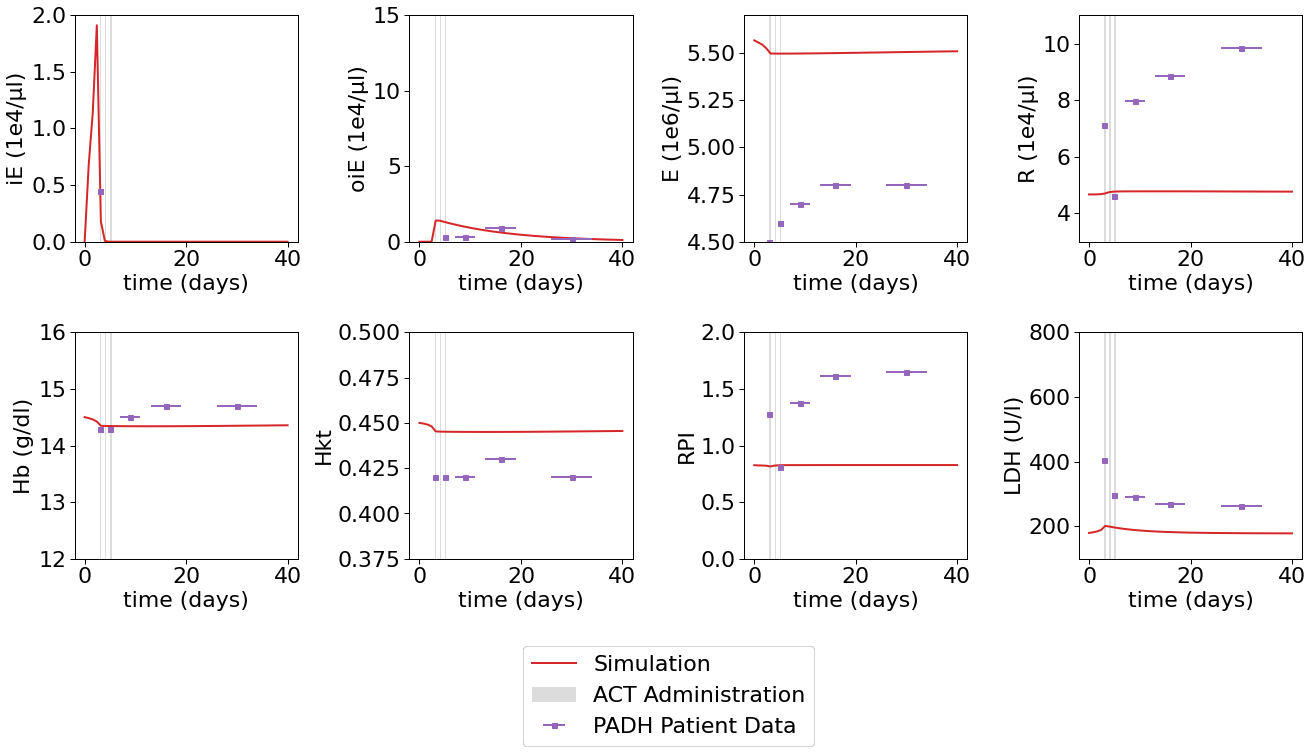

,[iE],[oiE],[E],[R],Hb,Hkt,RPI,LDH,time
time,,,,,,,,,
0,4500.0,NaN,4500000.0,71300.0,14.3,0.42,1.282319,404.0,3.000033
2,NaN,3220.000000,4600000.0,46200.0,14.3,0.42,0.811594,297.0,5.000033
6,NaN,3181.049065,4700000.0,79600.0,14.5,0.42,1.371594,290.0,9.000033
13,NaN,8888.888880,4800000.0,88700.0,14.7,0.43,1.615758,269.0,16.000033
27,NaN,1619.537280,4800000.0,98500.0,14.7,0.42,1.647536,264.0,30.000033


In [ ]:

size_of_font = 22



# Define lab and additional values
lab_values = ['[iE]','[oiE]', '[E]', '[R]', 'Hb', 'Hkt', 'RPI', 'LDH'] # pf.get_lab_values()
additional_values = [] #['k_E_death', '[iE]', '[P]', 'J_P_death']
all_values = lab_values + additional_values


# experimentel data
patient = '59'
data_df = pd.read_excel('.././datasets/haemolysismodel_conRetis.xlsx')   
df = dsl.long_format(data_df)
df_experimental_data = pf.preprocess_experimental_df(df, patient, lab_values)


# define Units dictionary
units_dict = {'[iE]':1e4, '[oiE]':1e4, '[E]':1e6, 'Hb':1, '[P]':1, '[R]':1e4, 'Hkt': 1, 'LDH':1, 'RPI':1} 
y_limits_dict = {
    '[iE]': (0, 20000),
    '[oiE]': (0, 150000),
    '[E]': (4.5e6, 5.7e6),
    '[R]': (3e4, 11e4),
    'Hb': (12, 16),
    'Hkt': (0.375, 0.5),
    'RPI': (0, 2),
    'LDH': (100, 800)
}

# Load optimization results
with open ('.././fitting/20230712-11-25-46paras_optimized.json', 'r') as jsonfile:    #r= only read
    optimize_results_file = json.load(jsonfile, object_pairs_hook=OrderedDict)

#new parameter
new_dict = optimize_results_file["results"][0]["best_params"]

# Update model with new parameters
ant_model = '.././model/OIE_model.ant'
ant_model = te.loada(ant_model)
ant_model = pf.update_model(ant_model, new_dict)

# Simulate the model
res = ant_model.simulate(0, 40, selections=['time']+ all_values)
df_simulated_data = pd.DataFrame(res, columns=res.colnames)

# Adjust time in experimental data
df_experimental_data['time'] = df_experimental_data.index + 10**new_dict['t_ART_add']
# times uncertainty
time_uncertainty = [0,0,2,3,4]

# Define number of rows and columns for the subplots
n_subplots = len(all_values)
n_cols = 4
n_rows = int(np.ceil(n_subplots/n_cols))
# Create subplots
fig, ax = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(22,10))  #(20,15)  #15,8
fig.subplots_adjust(hspace=0.4 ,wspace= 0.5)

# Loop over all lab values and create a plot for each
for i, lab_value in enumerate(all_values):
    col = i%n_cols
    row = i//n_cols
    ax[row, col].plot(df_simulated_data.time, df_simulated_data[lab_value]/units_dict[lab_value], color = 'tab:red',  label = 'Simulation',  linewidth=2)
    if lab_value in df_experimental_data.columns:   
        #ax[row, col].plot(df_experimental_data.time, df_experimental_data[lab_value]/units_dict[lab_value],'s',  markersize=5, color = 'tab:purple',  linewidth=2, label = 'PADH Patient Data')
        ax[row, col].errorbar(df_experimental_data.time, df_experimental_data[lab_value]/units_dict[lab_value], xerr=time_uncertainty, fmt='s', markersize=5, color='tab:purple', linewidth=2, label='PADH Patient Data')
        ax[row, col].set_ylim(y_limits_dict[lab_value][0]/units_dict[lab_value],y_limits_dict[lab_value][1]/units_dict[lab_value])

    
    time_ART_add = 10**new_dict['t_ART_add']
    ax[row, col].axvspan(time_ART_add, time_ART_add+0.3, facecolor='gainsboro', alpha=1, label='ACT Administration', linewidth=2)
    ax[row, col].axvspan(time_ART_add+1, time_ART_add+1.3, facecolor='gainsboro', alpha=1,  linewidth=2)
    ax[row, col].axvspan(time_ART_add+2, time_ART_add+2.3, facecolor='gainsboro', alpha=1,  linewidth=2)

    ax[row, col].tick_params(labelsize=size_of_font) # Größe Achseneinteilungen (zahlen)
    ax[row, col].set_xlabel('time (days)', fontsize= size_of_font)

    if lab_value == 'Hb': ax[row, col].set_ylabel('Hb (g/dl)', fontsize= size_of_font) 
    elif lab_value == '[R]': ax[row, col].set_ylabel('R (1e4/µl)', fontsize= size_of_font)
    elif lab_value == '[oiE]': ax[row, col].set_ylabel('oiE (1e4/µl)', fontsize= size_of_font)
    elif lab_value == '[E]': ax[row, col].set_ylabel('E (1e6/µl)', fontsize= size_of_font)   
    elif lab_value == '[iE]': ax[row, col].set_ylabel('iE (1e4/µl)', fontsize= size_of_font) 
    elif lab_value == 'Hkt': ax[row, col].set_ylabel('Hkt', fontsize= size_of_font)   
    elif lab_value == 'LDH': ax[row, col].set_ylabel('LDH (U/l)', fontsize= size_of_font)   
    elif lab_value == 'RPI': ax[row, col].set_ylabel('RPI', fontsize= size_of_font)  
    else: ax[row, col].set_ylabel(f'{lab_value} ({units_dict[lab_value]}/µl)', fontsize= size_of_font)
    
    ax[row, col].legend(fontsize = size_of_font, loc='upper right') # Größe legende

    handles, labels = ax[row, col].get_legend_handles_labels()  # Legend Box outsides Subplots
    fig.legend(handles, labels, loc='lower center',   bbox_to_anchor=(0.5, -0.15),  fontsize= size_of_font)
    #0.5, -0.11
    ax[row, col].get_legend().remove()  # entfernt Legende aus einzelnen Plots



plt.savefig("./figures/paramfit_nonPADH.pdf", format="pdf", bbox_inches='tight')

plt.show()

df_experimental_data 

### Parameter von Fitting vergleichen

#### PADH patient

In [ ]:

with open("../fitting/20230814-12-52-29paras_optimized.json","r") as fp:
    fit = json.load(fp)

df = pd.DataFrame([r["best_params"] for r in fit["results"]])
df = np.power(10,df)

udf = df.melt(
    var_name="parameter",value_name="value"
)
plt.figure(figsize=(10,10))
s = df.std()


jdf_PTH = pd.DataFrame([df.mean(),s/df.mean()]).T
jdf_PTH.columns =  ["mean_PTH","std_PTH"]
jdf_PTH.sort_values(by = "std_PTH")

,mean_PTH,std_PTH
t_ART_add,6.812940,0.000018
Hkt_init,0.440324,0.095119
k_E_infect,0.000001,0.185989
J_oiEdeath_0,6881.935942,0.195750
hill,2.274547,0.220512
t_oiE_death,9.378472,0.275380
I0_death_iE,0.000112,0.823170
k_iE_rupture,0.839533,0.863103
k_M_death,46.560972,0.943906
k_BH,0.001187,1.225847


<Figure size 720x720 with 0 Axes>

#### non PADH patient

In [16]:
with open("../fitting/20230814-12-54-32paras_optimized.json","r") as fp:
    fit = json.load(fp)

df = pd.DataFrame([r["best_params"] for r in fit["results"]])
df = np.power(10,df)

udf = df.melt(
    var_name="parameter",value_name="value"
)
plt.figure(figsize=(10,10))
s = df.std()


jdf_nonPTH = pd.DataFrame([df.mean(),s/df.mean()]).T
jdf_nonPTH.columns =  ["mean_nonPTH","std_nonPTH"]
jdf_nonPTH.sort_values(by = "std_nonPTH")

,mean_nonPTH,std_nonPTH
t_ART_add,3.000011,0.000007
Hkt_init,0.435089,0.127163
J_oiEdeath_0,7294.622283,0.178314
k_E_infect,0.000001,0.275058
t_oiE_death,8.769299,0.337979
hill,2.392053,0.347170
BH_max,7.758460,0.778592
k_BH,0.001471,0.917614
k_iE_rupture,2.989720,1.065091
M,16994.415752,1.327687


<Figure size 1000x1000 with 0 Axes>

AttributeError: 'DataFrame' object has no attribute 'iteritems'

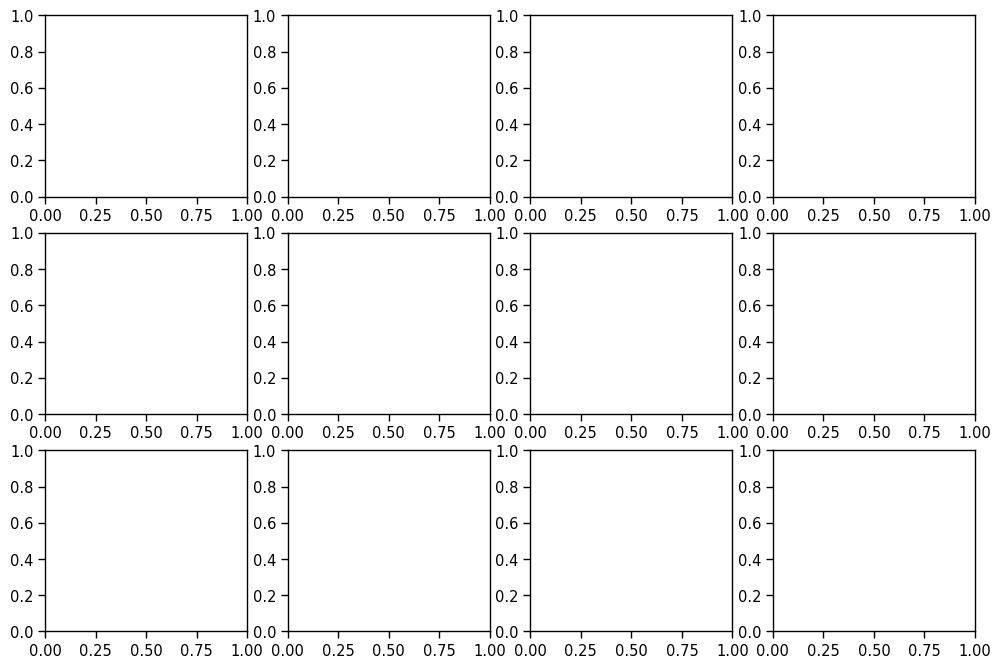

In [18]:
# Lade Daten aus dem ersten File
with open("../fitting/20230814-12-52-29paras_optimized.json", "r") as fp:
    fit_PTH = json.load(fp)
df_PTH = pd.DataFrame([r["best_params"] for r in fit_PTH["results"]])
df_PTH = np.power(10, df_PTH)

# Lade Daten aus dem zweiten File
with open("../fitting/20230814-12-54-32paras_optimized.json", "r") as fp:  #thesis plot
#with open("../fitting/20230815-11-08-00paras_optimized.json", "r") as fp:
    fit_nonPTH = json.load(fp)
df_nonPTH = pd.DataFrame([r["best_params"] for r in fit_nonPTH["results"]])
df_nonPTH = np.power(10, df_nonPTH)

# Plotten der Daten
fig, axes = plt.subplots(3, 4, figsize=(12,8))
axes = axes.ravel()  # Wandelt die 2D-Matrix von Achsen in ein 1D-Array um

for (param, _), ax in zip(df_PTH.iteritems(), axes):
    data_to_plot = [df_PTH[param].dropna().values, df_nonPTH[param].dropna().values]  # Removing NaN values
    ax.boxplot(data_to_plot, medianprops= dict(color='black'), patch_artist=True, boxprops =dict(color='black', facecolor='lightskyblue'))
    ax.set_title(param)
    ax.set_xticklabels(['PTH', 'nonPTH'])

plt.tight_layout()

#plt.savefig("./figures/params_boxplot.pdf", format="pdf")

plt.show()

AttributeError: 'DataFrame' object has no attribute 'iteritems'

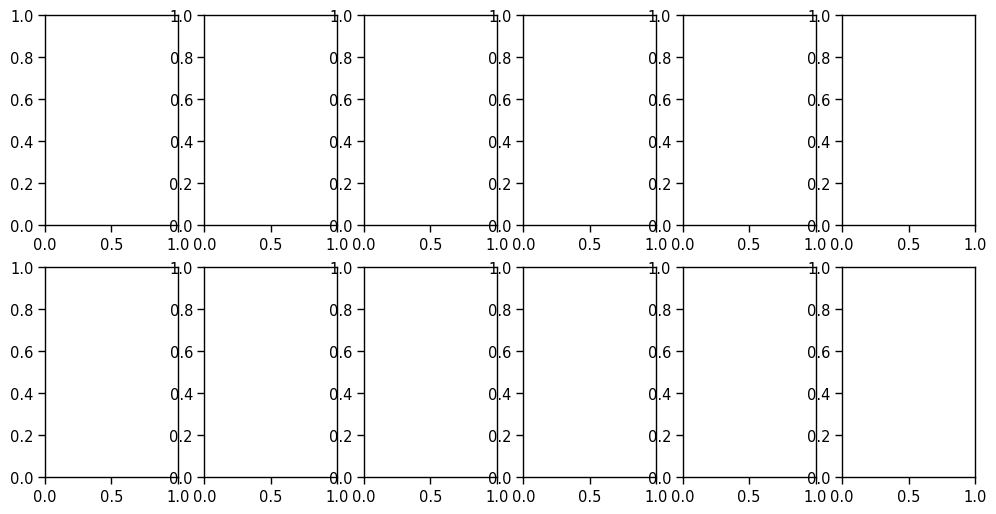

In [14]:
# hat Bounadries von aramfit als y-achsenabschnitt

from paramfitt_singlePatient import get_params_bounds
bounds = get_params_bounds()

# Lade Daten aus dem ersten File
with open("../fitting/20230814-12-52-29paras_optimized.json", "r") as fp:
    fit_PTH = json.load(fp)
df_PTH = pd.DataFrame([r["best_params"] for r in fit_PTH["results"]])
df_PTH = np.power(10, df_PTH)

# Lade Daten aus dem zweiten File
with open("../fitting/20230814-12-54-32paras_optimized.json", "r") as fp:  #thesis plot
#with open("../fitting/20230815-11-08-00paras_optimized.json", "r") as fp:
    fit_nonPTH = json.load(fp)
df_nonPTH = pd.DataFrame([r["best_params"] for r in fit_nonPTH["results"]])
df_nonPTH = np.power(10, df_nonPTH)

# Plotten 

columns = [
        't_ART_add',
        'M',
        'BH_max',
        'k_iE_rupture',
        'k_E_infect',
        'k_M_death',
        'I0_death_iE',
        'hill',
        't_oiE_death',
        'k_BH',
        'J_oiEdeath_0',
        'Hkt_init',
       ]

df_PTH = df_PTH[columns]
# Plotten der Daten
fig, axes = plt.subplots(2, 6, figsize=(12,6),sharex=False)
axes = axes.ravel()  # Wandelt die 2D-Matrix von Achsen in ein 1D-Array um

for (param, _), ax in zip(df_PTH.iteritems(), axes):
    data_to_plot = [df_PTH[param].dropna().values, df_nonPTH[param].dropna().values]  # Removing NaN values
    ax.boxplot(data_to_plot, labels = ['PADH', 'nonPADH'],medianprops= dict(color='black'), patch_artist=True, boxprops=dict(color='black', facecolor='lightskyblue'),widths=.6)
    
    ax.set_ylabel(param)
    
    #ax.set_xticklabels()
    ax.ticklabel_format(axis = "y", style="sci",scilimits = (1,3))
    
    # Setze die y-Achsenwerte für den aktuellen Parameter
    ax.set_ylim(bounds[param])

plt.tight_layout()
plt.savefig("./figures/params_boxplot.pdf", format="pdf")
plt.show()

df_PTH

In [ ]:
df_PTH.columns

Index(['t_ART_add', 'M', 'BH_max', 'k_iE_rupture', 'k_E_infect', 'k_M_death',
       'I0_death_iE', 'hill', 't_oiE_death', 'k_BH', 'J_oiEdeath_0',
       'Hkt_init'],
      dtype='object')